<a href="https://colab.research.google.com/github/Jonchyk/Vis/blob/main/PS4_vis_northsouth_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab is an online place (cloud) for running Python notebooks--we will use it to run our vis :)

You can just edit and adjust and and run the notebook I gave you [this file!]: don't forget to first save it!!!: File-Save a copy in GitHub

And after adjusting to run with your own data, you can submit it as ps :)

After making edits, while can diff on GitHub, its clunky, better here: File-Revision History

(a sidenote: File-Download it and convert to pdf: https://2pdf.com/convert-ipynb-to-pdf)

make webbrowser fullscreen and collapse upper menu (arrow on the right), especially on laptop

#SETUP

In [1]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg
##https://www.marktechpost.com/2023/10/20/6-magic-commands-for-jupyter-notebooks-in-python-data-science/
#%%latex
#%ai
#%run
#%writefile
#%history -n

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#sometimes have to install library which you get from https://pypi.org/
#!pip install geopandas


In [2]:
pd.set_option("display.max_columns", None)



note:  pandas is kind of like stata, or more like r, but not really like
the rest of Py, and helps a lot with traditional data

REFS:

https://www.youtube.com/watch?v=5rNu16O3YNE&t=3676s

https://www.danielmsullivan.com/pages/tutorial_stata_to_python.html

https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_stata.html and on the left there's also r, sas, spreadsheet

https://aeturrell.github.io/coding-for-economists/coming-from-stata.html

https://towardsdatascience.com/going-from-stata-to-pandas-706888525acf

http://statapython.blogspot.com/

http://www.dataschool.io/best-python-pandas-resources/

https://www.dataquest.io/blog/pandas-python-tutorial/

many great tutorials for self study:
https://pandas.pydata.org/pandas-docs/stable/tutorials.html

tutorials in notebooks (just click on folder and may just go straight to one with solutions
and run them in Python):

https://github.com/guipsamora/pandas_exercises/tree/master/01_Getting_%26_Knowing_Your_Data

https://github.com/guipsamora/pandas_exercises/tree/master/06_Stats  

https://github.com/guipsamora/pandas_exercises/tree/master/07_Visualization

for afficionados: https://jakevdp.github.io/PythonDataScienceHandbook/
eg it shows how pandas builds on numpy and whats under the hood


#Research Problem                                         
Note - this is a draft that is being revised, edited, and fixed for capstone.

Research Problem Statement
The final proposed research aims to explore the relationship between Grade 2 test scores and National Scholarship Test scores in Kyrgyzstan. Specifically, the study will examine how these scores vary across regions, languages of instruction, and subnational socio-economic indicators. This research is significant because prior studies in international education emphasize that early-grade literacy and numeracy acquisition is critical for future learning success. Those who do not learn to level early, will struggle to catch up in the future and see their educational progress and outcomes stymied as a result.

Understanding whether disparities in test scores observed at later stages are present as early as Grade 2 will help inform education policy. Equipped with this information, policymakers could assess the effectiveness of maintaining two official languages and the impacts of urbanization on educational equity.
Research Aim: Testing

The primary aim of this research is to primarily investigate the correlation between early-grade learning outcomes and later academic performance, using a lens of region, language, and subnational data to further explore the relationships. The research draws on the following insights from the literature:
1.	Early-grade literacy and numeracy acquisition are critical and serves as a strong predictor of future academic success.
2.	Kyrgyzstan is a multilingual country with two official languages (Kyrgyz and Russian), with other local languages spoken depending on ethnic background.
3.	Rapid population growth and urbanization have concentrated wealth, opportunities, and funding in the capital, Bishkek.
4.	Kyrgyzstan’s geography presents significant challenges to its educational system due to hazardous mountain passes, frequent natural disasters (e.g., landslides), and the remoteness of many schools.
5.	National Scholarship Test scores show disparities based on language of instruction and geography: students taking the test in Russian and those in Bishkek consistently perform better than their peers in other regions.
Based on this information, this research will test whether these factors can be linked to disparities in early-grade educational outcomes. The hypothesis is that regional, linguistic, and socio-economic differences will be seen to be present at Grade 2, and will contribute to ongoing long-term disparities in academic achievement, as reflected in current scholarship testing outcomes. This would indicate the problem is more systematic and continuing.

Proposed Research Questions
1.	Can the regional and linguistic disparities observed in National Scholarship Test scores also be identified as early as Grade 2?
2.	How does the language of instruction affect Grade 2 reading and numeracy scores within and across regions?


#PS1 - Datasets:

1. Kyrgyz Bureau of Labor Statistics, Per Capita Income (cleaned to USD)
2. UN Global Data Lab, Population Statistics with CAGR appended
3. EGRA dataset
4. INFORM Disaster Incidence Dataset

**First Merge**:  will be merging dataset 1 + 2. per capita income converted to USD and the population growth in Kyrgyzstan by Region.

This will be interesting as we can compare how income has grown in line with population. The population data is from the UN global data lab, while the per capita income is from the Kyrgyz Bureau of Statistics.

This will help me get an idea around the demographics issues i've read about in Kyrgyzstan, and perhaps point me to future data I need to gather/run to better understand what is happening in the country.


**Second Merge**: For my second Merge - will take the EGRA data and the INFORM Disaster incidence data and merge on region.

I'll do some data cleaning per the instructions for PS1. Noting, I will need to do more with the EGRA to ensure I select the exact variables I need, and nothing more. Right now i'm still reviewing that data - I figure it will be reasonable to finalize cleaning the EGRA data to a more finalized format for PS2.

##Merge 1 - Per Capita Income in USD and Population - Subnational Level


In [3]:
#download file from online and save in colab as pop.csv;
!wget -q -O pop1.csv https://docs.google.com/spreadsheets/d/1KhpzQlgZqSFgO1Y-axXpSwrsVn9keIhAUITR_m_YIDw/export?format=csv
#download the income file as well.
!wget -q -O income.csv https://docs.google.com/spreadsheets/d/1IQ6YXPmOTZReA-DLWcKqbzkxAsplvrZM9ggXKITnhO4/export?format=csv

In [4]:
# basic navigation
#wd =  'ex1'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
income.csv  pop1.csv  sample_data


In [5]:
#read in my files
pop = pd.read_csv('pop1.csv')
pop
income = pd.read_csv('income.csv')
income

Region  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
0       Total  5.04  5.10  5.16  5.22  5.28  5.35  5.41  5.48  5.54  5.61   
1      Batken  0.42  0.42  0.42  0.42  0.42  0.42  0.43  0.43  0.43  0.43   
2     Bishkek  0.78  0.82  0.86  0.90  0.88  0.87  0.85  0.84  0.83  0.81   
3        Chuy  0.80  0.80  0.80  0.80  0.83  0.86  0.89  0.91  0.94  0.97   
4   Issyk-Kul  0.42  0.42  0.41  0.41  0.42  0.44  0.45  0.47  0.48  0.50   
5  Jalal-Abad  0.93  0.94  0.96  0.97  0.97  0.98  0.98  0.98  0.98  0.99   
6       Naryn  0.25  0.25  0.25  0.24  0.25  0.25  0.25  0.25  0.26  0.26   
7         Osh  1.37  1.34  1.30  1.27  1.29  1.30  1.32  1.34  1.35  1.37   
8       Talas  0.21  0.21  0.21  0.21  0.22  0.23  0.25  0.26  0.27  0.28   

   2013  2014  2015  2016  2017  2018  2019  2020  2021  CAGR  
0  5.72  5.84  5.96  6.08  6.20  6.32  6.44  6.57  6.69  1.52  
1  0.45  0.48  0.47  0.47  0.46  0.46  0.46  0.45  0.45  0.38  
2  0.78  0.75  0.86  0.97  1.08  1.19  1.31  1.42  1.53  3.53  
3  1.01  1.04  1.03  1.01  0.99  0.98  0.96  0.95  0.93  0.84  
4  0.47  0.44  0.45  0.47  0.48  0.50  0.51  0.53  0.54  1.41  
5  1.07  1.15  1.13  1.10  1.07  1.05  1.02  0.99  0.96  0.12  
6  0.27  0.28  0.28  0.29  0.29  0.30  0.30  0.31  0.31  1.20  
7  1.39  1.41  1.45  1.49  1.53  1.57  1.62  1.66  1.70  1.33  
8  0.29  0.30  0.29  0.29  0.28  0.28  0.27  0.27  0.26  1.19

Region   2019   2020   2021  \
0                                 Kyrgyz Republic  65.01  64.33  76.02   
1                                   Batken oblast  61.14  61.60  70.96   
2                               Jalal-Abat oblast  60.53  61.92  76.30   
3                                Yssyk-Kul oblast  65.40  73.57  82.03   
4                                    Naryn oblast  53.33  52.47  66.42   
5  Osh oblast  (until 2013 y. including Osh city)  67.63  65.19  79.16   
6                                    Talas oblast  55.28  60.18  65.55   
7                                     Chui oblast  69.94  66.03  77.25   
8                                    Bishkek city  72.51  68.76  79.43   
9                                        Osh city  55.94  54.55  63.16   

     2022    2023  
0   90.89  111.10  
1   86.13  112.95  
2   94.38  118.10  
3  104.23  115.56  
4   81.15   94.80  
5   89.52  108.78  
6   79.89   96.13  
7   91.20  106.32  
8   97.02  123.12  
9   67.69   86.69

In [6]:
#rename names so we can merge - replace method.
income['Region'] = income['Region'].replace({
    'Kyrgyz Republic': 'Total',
    'Batken oblast': 'Batken',
    'Jalal-Abat oblast': 'Jalal-Abad',
    'Yssyk-Kul oblast': 'Issyk-Kul',
    'Naryn oblast': 'Naryn',
    'Osh city': 'Osh',
    'Talas oblast': 'Talas',
    'Chui oblast': 'Chuy',
    'Bishkek city': 'Bishkek'
})
income
#not great that  osh and osh city are here. can't merge those, though perhaps we could play with pop data to backtest a merged amount.
#for now let's drop osh oblast and focus on the city since this is just for ease of use.
income.drop(index=5, inplace=True)
income


Region   2019   2020   2021  \
0                                           Total  65.01  64.33  76.02   
1                                          Batken  61.14  61.60  70.96   
2                                      Jalal-Abad  60.53  61.92  76.30   
3                                       Issyk-Kul  65.40  73.57  82.03   
4                                           Naryn  53.33  52.47  66.42   
5  Osh oblast  (until 2013 y. including Osh city)  67.63  65.19  79.16   
6                                           Talas  55.28  60.18  65.55   
7                                            Chuy  69.94  66.03  77.25   
8                                         Bishkek  72.51  68.76  79.43   
9                                             Osh  55.94  54.55  63.16   

     2022    2023  
0   90.89  111.10  
1   86.13  112.95  
2   94.38  118.10  
3  104.23  115.56  
4   81.15   94.80  
5   89.52  108.78  
6   79.89   96.13  
7   91.20  106.32  
8   97.02  123.12  
9   67.69   86.69

Region   2019   2020   2021    2022    2023
0       Total  65.01  64.33  76.02   90.89  111.10
1      Batken  61.14  61.60  70.96   86.13  112.95
2  Jalal-Abad  60.53  61.92  76.30   94.38  118.10
3   Issyk-Kul  65.40  73.57  82.03  104.23  115.56
4       Naryn  53.33  52.47  66.42   81.15   94.80
6       Talas  55.28  60.18  65.55   79.89   96.13
7        Chuy  69.94  66.03  77.25   91.20  106.32
8     Bishkek  72.51  68.76  79.43   97.02  123.12
9         Osh  55.94  54.55  63.16   67.69   86.69

In [7]:
#can i try merging now?
popincome = pd.merge(pop, income, on='Region', how='outer')

#ok! this is cool. I think i need to clean up the columns since now i have 2019_x, and y. that's a good lesson for next time to do it prior to merging. beginner's mistake.
popincome.rename(columns={'2019_x':'2019','2020_x':'2020','2021_x':'2021','2019_y': '2019 income', '2020_y': '2020 income', '2021_y': '2021 income', '2022':'2022 income', '2023':'2023 income'}, inplace=True)
popincome

Region  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
0      Batken  0.42  0.42  0.42  0.42  0.42  0.42  0.43  0.43  0.43  0.43   
1     Bishkek  0.78  0.82  0.86  0.90  0.88  0.87  0.85  0.84  0.83  0.81   
2        Chuy  0.80  0.80  0.80  0.80  0.83  0.86  0.89  0.91  0.94  0.97   
3   Issyk-Kul  0.42  0.42  0.41  0.41  0.42  0.44  0.45  0.47  0.48  0.50   
4  Jalal-Abad  0.93  0.94  0.96  0.97  0.97  0.98  0.98  0.98  0.98  0.99   
5       Naryn  0.25  0.25  0.25  0.24  0.25  0.25  0.25  0.25  0.26  0.26   
6         Osh  1.37  1.34  1.30  1.27  1.29  1.30  1.32  1.34  1.35  1.37   
7       Talas  0.21  0.21  0.21  0.21  0.22  0.23  0.25  0.26  0.27  0.28   
8       Total  5.04  5.10  5.16  5.22  5.28  5.35  5.41  5.48  5.54  5.61   

   2013  2014  2015  2016  2017  2018  2019  2020  2021  CAGR  2019 income  \
0  0.45  0.48  0.47  0.47  0.46  0.46  0.46  0.45  0.45  0.38        61.14   
1  0.78  0.75  0.86  0.97  1.08  1.19  1.31  1.42  1.53  3.53        72.51   
2  1.01  1.04  1.03  1.01  0.99  0.98  0.96  0.95  0.93  0.84        69.94   
3  0.47  0.44  0.45  0.47  0.48  0.50  0.51  0.53  0.54  1.41        65.40   
4  1.07  1.15  1.13  1.10  1.07  1.05  1.02  0.99  0.96  0.12        60.53   
5  0.27  0.28  0.28  0.29  0.29  0.30  0.30  0.31  0.31  1.20        53.33   
6  1.39  1.41  1.45  1.49  1.53  1.57  1.62  1.66  1.70  1.33        55.94   
7  0.29  0.30  0.29  0.29  0.28  0.28  0.27  0.27  0.26  1.19        55.28   
8  5.72  5.84  5.96  6.08  6.20  6.32  6.44  6.57  6.69  1.52        65.01   

   2020 income  2021 income  2022 income  2023 income  
0        61.60        70.96        86.13       112.95  
1        68.76        79.43        97.02       123.12  
2        66.03        77.25        91.20       106.32  
3        73.57        82.03       104.23       115.56  
4        61.92        76.30        94.38       118.10  
5        52.47        66.42        81.15        94.80  
6        54.55        63.16        67.69        86.69  
7        60.18        65.55        79.89        96.13  
8        64.33        76.02        90.89       111.10

In [8]:
popincome.columns #list var names

Index(['Region', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', 'CAGR', '2019 income', '2020 income',
       '2021 income', '2022 income', '2023 income'],
      dtype='object')

In [9]:
popincome.head(2)
popincome.tail(2)

Region  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  \
0   Batken  0.42  0.42  0.42  0.42  0.42  0.42  0.43  0.43  0.43  0.43  0.45   
1  Bishkek  0.78  0.82  0.86  0.90  0.88  0.87  0.85  0.84  0.83  0.81  0.78   

   2014  2015  2016  2017  2018  2019  2020  2021  CAGR  2019 income  \
0  0.48  0.47  0.47  0.46  0.46  0.46  0.45  0.45  0.38        61.14   
1  0.75  0.86  0.97  1.08  1.19  1.31  1.42  1.53  3.53        72.51   

   2020 income  2021 income  2022 income  2023 income  
0        61.60        70.96        86.13       112.95  
1        68.76        79.43        97.02       123.12

Region  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  \
7  Talas  0.21  0.21  0.21  0.21  0.22  0.23  0.25  0.26  0.27  0.28  0.29   
8  Total  5.04  5.10  5.16  5.22  5.28  5.35  5.41  5.48  5.54  5.61  5.72   

   2014  2015  2016  2017  2018  2019  2020  2021  CAGR  2019 income  \
7  0.30  0.29  0.29  0.28  0.28  0.27  0.27  0.26  1.19        55.28   
8  5.84  5.96  6.08  6.20  6.32  6.44  6.57  6.69  1.52        65.01   

   2020 income  2021 income  2022 income  2023 income  
7        60.18        65.55        79.89        96.13  
8        64.33        76.02        90.89       111.10

In [10]:
popincome #get spreadsheet view: can sort on cols, filter, and copy

Region  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
0      Batken  0.42  0.42  0.42  0.42  0.42  0.42  0.43  0.43  0.43  0.43   
1     Bishkek  0.78  0.82  0.86  0.90  0.88  0.87  0.85  0.84  0.83  0.81   
2        Chuy  0.80  0.80  0.80  0.80  0.83  0.86  0.89  0.91  0.94  0.97   
3   Issyk-Kul  0.42  0.42  0.41  0.41  0.42  0.44  0.45  0.47  0.48  0.50   
4  Jalal-Abad  0.93  0.94  0.96  0.97  0.97  0.98  0.98  0.98  0.98  0.99   
5       Naryn  0.25  0.25  0.25  0.24  0.25  0.25  0.25  0.25  0.26  0.26   
6         Osh  1.37  1.34  1.30  1.27  1.29  1.30  1.32  1.34  1.35  1.37   
7       Talas  0.21  0.21  0.21  0.21  0.22  0.23  0.25  0.26  0.27  0.28   
8       Total  5.04  5.10  5.16  5.22  5.28  5.35  5.41  5.48  5.54  5.61   

   2013  2014  2015  2016  2017  2018  2019  2020  2021  CAGR  2019 income  \
0  0.45  0.48  0.47  0.47  0.46  0.46  0.46  0.45  0.45  0.38        61.14   
1  0.78  0.75  0.86  0.97  1.08  1.19  1.31  1.42  1.53  3.53        72.51   
2  1.01  1.04  1.03  1.01  0.99  0.98  0.96  0.95  0.93  0.84        69.94   
3  0.47  0.44  0.45  0.47  0.48  0.50  0.51  0.53  0.54  1.41        65.40   
4  1.07  1.15  1.13  1.10  1.07  1.05  1.02  0.99  0.96  0.12        60.53   
5  0.27  0.28  0.28  0.29  0.29  0.30  0.30  0.31  0.31  1.20        53.33   
6  1.39  1.41  1.45  1.49  1.53  1.57  1.62  1.66  1.70  1.33        55.94   
7  0.29  0.30  0.29  0.29  0.28  0.28  0.27  0.27  0.26  1.19        55.28   
8  5.72  5.84  5.96  6.08  6.20  6.32  6.44  6.57  6.69  1.52        65.01   

   2020 income  2021 income  2022 income  2023 income  
0        61.60        70.96        86.13       112.95  
1        68.76        79.43        97.02       123.12  
2        66.03        77.25        91.20       106.32  
3        73.57        82.03       104.23       115.56  
4        61.92        76.30        94.38       118.10  
5        52.47        66.42        81.15        94.80  
6        54.55        63.16        67.69        86.69  
7        60.18        65.55        79.89        96.13  
8        64.33        76.02        90.89       111.10

In [11]:
#while maybe it's not useful data, it would be interesting to see what the income per region is. I have population in millions, and a per capita income I calculated previously. one multiplied by the other gives the gross income per region
popincome['2019 income'] = pd.to_numeric(popincome['2019 income'], errors='coerce')
popincome['2019 income'] = pd.to_numeric(popincome['2019 income'], errors='coerce')

popincome['2019_reginc'] = (popincome['2019'] * popincome['2019 income'])

popincome['2019_reginc'] = (popincome['2019_reginc'] * 1000000) #since population is in millions, we need to adjust this.




So, using two seperate data sources we've calculated what could be the national income in 2019.

In [12]:
popincome #did I manage to add it?

Region  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
0      Batken  0.42  0.42  0.42  0.42  0.42  0.42  0.43  0.43  0.43  0.43   
1     Bishkek  0.78  0.82  0.86  0.90  0.88  0.87  0.85  0.84  0.83  0.81   
2        Chuy  0.80  0.80  0.80  0.80  0.83  0.86  0.89  0.91  0.94  0.97   
3   Issyk-Kul  0.42  0.42  0.41  0.41  0.42  0.44  0.45  0.47  0.48  0.50   
4  Jalal-Abad  0.93  0.94  0.96  0.97  0.97  0.98  0.98  0.98  0.98  0.99   
5       Naryn  0.25  0.25  0.25  0.24  0.25  0.25  0.25  0.25  0.26  0.26   
6         Osh  1.37  1.34  1.30  1.27  1.29  1.30  1.32  1.34  1.35  1.37   
7       Talas  0.21  0.21  0.21  0.21  0.22  0.23  0.25  0.26  0.27  0.28   
8       Total  5.04  5.10  5.16  5.22  5.28  5.35  5.41  5.48  5.54  5.61   

   2013  2014  2015  2016  2017  2018  2019  2020  2021  CAGR  2019 income  \
0  0.45  0.48  0.47  0.47  0.46  0.46  0.46  0.45  0.45  0.38        61.14   
1  0.78  0.75  0.86  0.97  1.08  1.19  1.31  1.42  1.53  3.53        72.51   
2  1.01  1.04  1.03  1.01  0.99  0.98  0.96  0.95  0.93  0.84        69.94   
3  0.47  0.44  0.45  0.47  0.48  0.50  0.51  0.53  0.54  1.41        65.40   
4  1.07  1.15  1.13  1.10  1.07  1.05  1.02  0.99  0.96  0.12        60.53   
5  0.27  0.28  0.28  0.29  0.29  0.30  0.30  0.31  0.31  1.20        53.33   
6  1.39  1.41  1.45  1.49  1.53  1.57  1.62  1.66  1.70  1.33        55.94   
7  0.29  0.30  0.29  0.29  0.28  0.28  0.27  0.27  0.26  1.19        55.28   
8  5.72  5.84  5.96  6.08  6.20  6.32  6.44  6.57  6.69  1.52        65.01   

   2020 income  2021 income  2022 income  2023 income  2019_reginc  
0        61.60        70.96        86.13       112.95   28124400.0  
1        68.76        79.43        97.02       123.12   94988100.0  
2        66.03        77.25        91.20       106.32   67142400.0  
3        73.57        82.03       104.23       115.56   33354000.0  
4        61.92        76.30        94.38       118.10   61740600.0  
5        52.47        66.42        81.15        94.80   15999000.0  
6        54.55        63.16        67.69        86.69   90622800.0  
7        60.18        65.55        79.89        96.13   14925600.0  
8        64.33        76.02        90.89       111.10  418664400.0

In [13]:
#let's look at the region, start year, end year, and the CAGR i calculated in datamanagement.

popincome[["Region","2003", "2021", "CAGR"]][0:9]


Region  2003  2021  CAGR
0      Batken  0.42  0.45  0.38
1     Bishkek  0.78  1.53  3.53
2        Chuy  0.80  0.93  0.84
3   Issyk-Kul  0.42  0.54  1.41
4  Jalal-Abad  0.93  0.96  0.12
5       Naryn  0.25  0.31  1.20
6         Osh  1.37  1.70  1.33
7       Talas  0.21  0.26  1.19
8       Total  5.04  6.69  1.52

In [14]:
#instead of just calculating the mean, what if we calculated the total difference 2021 - 2003?
popincome['grosspopchg'] = popincome['2021'] - popincome['2003']
popincome

Region  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
0      Batken  0.42  0.42  0.42  0.42  0.42  0.42  0.43  0.43  0.43  0.43   
1     Bishkek  0.78  0.82  0.86  0.90  0.88  0.87  0.85  0.84  0.83  0.81   
2        Chuy  0.80  0.80  0.80  0.80  0.83  0.86  0.89  0.91  0.94  0.97   
3   Issyk-Kul  0.42  0.42  0.41  0.41  0.42  0.44  0.45  0.47  0.48  0.50   
4  Jalal-Abad  0.93  0.94  0.96  0.97  0.97  0.98  0.98  0.98  0.98  0.99   
5       Naryn  0.25  0.25  0.25  0.24  0.25  0.25  0.25  0.25  0.26  0.26   
6         Osh  1.37  1.34  1.30  1.27  1.29  1.30  1.32  1.34  1.35  1.37   
7       Talas  0.21  0.21  0.21  0.21  0.22  0.23  0.25  0.26  0.27  0.28   
8       Total  5.04  5.10  5.16  5.22  5.28  5.35  5.41  5.48  5.54  5.61   

   2013  2014  2015  2016  2017  2018  2019  2020  2021  CAGR  2019 income  \
0  0.45  0.48  0.47  0.47  0.46  0.46  0.46  0.45  0.45  0.38        61.14   
1  0.78  0.75  0.86  0.97  1.08  1.19  1.31  1.42  1.53  3.53        72.51   
2  1.01  1.04  1.03  1.01  0.99  0.98  0.96  0.95  0.93  0.84        69.94   
3  0.47  0.44  0.45  0.47  0.48  0.50  0.51  0.53  0.54  1.41        65.40   
4  1.07  1.15  1.13  1.10  1.07  1.05  1.02  0.99  0.96  0.12        60.53   
5  0.27  0.28  0.28  0.29  0.29  0.30  0.30  0.31  0.31  1.20        53.33   
6  1.39  1.41  1.45  1.49  1.53  1.57  1.62  1.66  1.70  1.33        55.94   
7  0.29  0.30  0.29  0.29  0.28  0.28  0.27  0.27  0.26  1.19        55.28   
8  5.72  5.84  5.96  6.08  6.20  6.32  6.44  6.57  6.69  1.52        65.01   

   2020 income  2021 income  2022 income  2023 income  2019_reginc  \
0        61.60        70.96        86.13       112.95   28124400.0   
1        68.76        79.43        97.02       123.12   94988100.0   
2        66.03        77.25        91.20       106.32   67142400.0   
3        73.57        82.03       104.23       115.56   33354000.0   
4        61.92        76.30        94.38       118.10   61740600.0   
5        52.47        66.42        81.15        94.80   15999000.0   
6        54.55        63.16        67.69        86.69   90622800.0   
7        60.18        65.55        79.89        96.13   14925600.0   
8        64.33        76.02        90.89       111.10  418664400.0   

   grosspopchg  
0         0.03  
1         0.75  
2         0.13  
3         0.12  
4         0.03  
5         0.06  
6         0.33  
7         0.05  
8         1.65

In [15]:
popincome["2019 income"].value_counts(dropna=False) #.nlargest(3) a tab or freq table. This doesn't work well with my current data

2019 income
61.14    1
72.51    1
69.94    1
65.40    1
60.53    1
53.33    1
55.94    1
55.28    1
65.01    1
Name: count, dtype: int64

<Axes: >

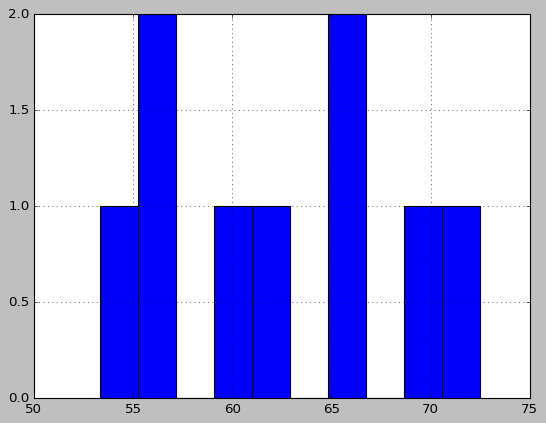

In [16]:
popincome["2019 income"].hist() #done, but not sure this is great

<Axes: xlabel='Region', ylabel='[2019 income]'>

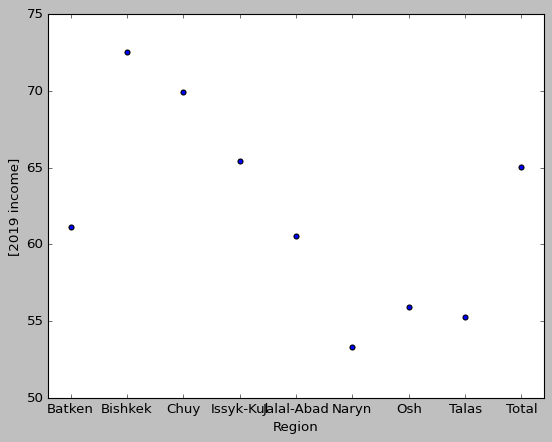

In [17]:
popincome.plot(kind='scatter', y=['2019 income'], x='Region') #This is what sparked me going back and merging the two files; region vs incomes isn't interesting. Population vs income is!

Text(0.46, 61.14, 'Batken')

Text(1.31, 72.51, 'Bishkek')

Text(0.96, 69.94, 'Chuy')

Text(0.51, 65.4, 'Issyk-Kul')

Text(1.02, 60.53, 'Jalal-Abad')

Text(0.3, 53.33, 'Naryn')

Text(1.62, 55.94, 'Osh')

Text(0.27, 55.28, 'Talas')

Text(6.44, 65.01, 'Total')

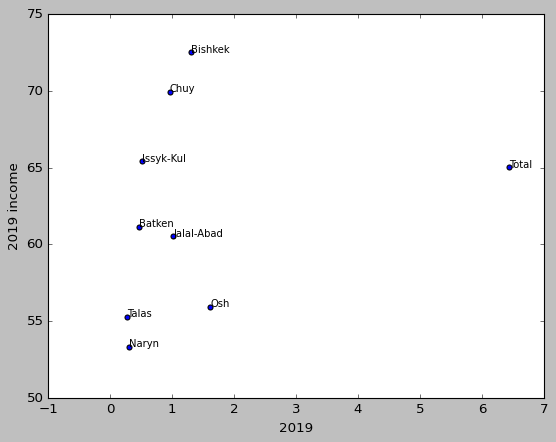

In [18]:
#So apparently, if I want to create a scatterplot with labels, need to use the following code and "ax"...Will learn more to see if there's a differnet way to do it.
ax = popincome.plot(kind='scatter', x='2019', y='2019 income')
# Add region labels to the plot using the following:
for i, row in popincome.iterrows():
    ax.text(row['2019'], row['2019 income'], row['Region'], fontsize=9)

Text(0.45, 61.6, 'Batken')

Text(1.42, 68.76, 'Bishkek')

Text(0.95, 66.03, 'Chuy')

Text(0.53, 73.57, 'Issyk-Kul')

Text(0.99, 61.92, 'Jalal-Abad')

Text(0.31, 52.47, 'Naryn')

Text(1.66, 54.55, 'Osh')

Text(0.27, 60.18, 'Talas')

Text(6.57, 64.33, 'Total')

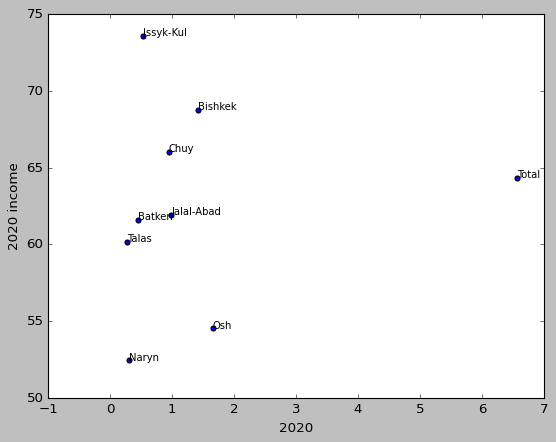

In [19]:
# doing this for 2020 now.
ax = popincome.plot(kind='scatter', x='2020', y='2020 income')
# Add region labels to the plot
for i, row in popincome.iterrows():
    ax.text(row['2020'], row['2020 income'], row['Region'], fontsize=9)
#interesting to note Issyk-Kul jumped way up!

In [20]:
#finalstep, let's get that csv file i merged all downloaded!
from google.colab import files
#convert dataframe to csv
popincome.to_csv('pop_incomepercapita.csv', index=False)

# Download the file.
files.download('pop_incomepercapita.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Recap - Merge 1
I'm not sure this merge will be useful for the final product, but this was helpful practice in both renaming, checking datatypes, changing datatypes (Str or int) and cleaning up files and naming conventions. The fact that this doesn't have a seperate Osh vs Osh City for income isn't helpful. I still can use the population data however for down below (when I need to do further merges for later problem sets).

It is cool to notice how per capita income has doubled; and I now have questions about the population breakout because the per capita income reported is far less than the actual median income in Kyrgyzstan. There has to be either a really high level of unemployment, or a really large youth and elderly population skewing the data down. I'll have to find another dataset on population percentage by age breakout (UN global datalab has one) and employment statistics.


##Merge 2 - EGRA Data and Disaster Incidence
Will load the EGRA dataset and the Disaster Incidence Data from Inform here.

For the EGRA data, will aggregrate scores by region, after renaming region. Will drop most variables, but will keep the reading comp scores and numeracy scores.

Will clean, rename/replace region, and merge on region





In [21]:
# let's load the EGRA data
!wget --no-check-certificate 'https://docs.google.com/spreadsheets/d/1Rq8nK25uEKsjwwcu0Sr1IF1oBD6N2BwbmFW5VeiGAfU/export?format=csv' -O Datareading.csv
#and let's load the inform disaster incidence data
!wget --no-check-certificate "https://docs.google.com/spreadsheets/d/1CMnd_Q6dslsVYN3u1ueaugox47WUwEFQr2R_cqomBys/export?format=csv&gid=16033786" -O disaster.csv
#defining both datasets now
egra = pd.read_csv('Datareading.csv')
disaster = pd.read_csv('disaster.csv')


--2025-04-03 21:55:54--  https://docs.google.com/spreadsheets/d/1Rq8nK25uEKsjwwcu0Sr1IF1oBD6N2BwbmFW5VeiGAfU/export?format=csv
Resolving docs.google.com (docs.google.com)... 172.217.214.101, 172.217.214.100, 172.217.214.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.214.101|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0c-7s-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/1fjljdf7uj7snh5d721p40r0c4/1743717350000/113781219181981321798/*/1Rq8nK25uEKsjwwcu0Sr1IF1oBD6N2BwbmFW5VeiGAfU?format=csv [following]
--2025-04-03 21:55:54--  https://doc-0c-7s-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/1fjljdf7uj7snh5d721p40r0c4/1743717350000/113781219181981321798/*/1Rq8nK25uEKsjwwcu0Sr1IF1oBD6N2BwbmFW5VeiGAfU?format=csv
Resolving doc-0c-7s-sheets.googleusercontent.com (doc-0c-7s-sheets.googleusercontent.com)... 142.250.125.132, 2607:f8b0:4001:c2f::84
Connecting to doc-0c-7s-sheets.googleuser

<ipython-input-21-140ff91c9ba7>:6: DtypeWarning: Columns (15,18,19,20,21,22,23,24,25,27,28,30,31,32,33,34,35,36,37,38,39,44,45,46,50,52,58,59,60,67,69,70,71,80,90,95,96,100,101,102,104,108,109,110,115,121,128,132,133,134,136,137,138,139,140,141,146,147,148,152,155,156,157,158,159,167,168,176,178,179,185,192,200,201,212,219,220,229,230,241,242,243,245,253,254,263,267,268,269,271,276,277,278,280,281,290,291,292,293,294,300,301,305,306,307,311,312,313,314,315,323,324,326,327,328,333,337,338,391,392,393,396,397,452,453,454,455,456,457,458,459,460,461,462,463,464,465,468,469,475,476,478,479,485,486,488,489,500,501,503,504,510,511,513,514,520,521,523,524,533,535,549,551,555,559,563,565,567,569,571,572,573,574,575,576,582,583,584,585,586,587,588,592,593,604,605,608,610,624,626,629,630,631,632,633,634,637,638,639,640,642,643,644,645,647,648,649,650,652,653,654,655,660,661,662,663,664,665,667,670,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696

In [22]:
disaster.head(1)
egra.head(1)
#same issues as in data management. Need to do some initial cleaning on both. Let's start with the disaster file.


Unnamed: 0                  Unnamed: 1  Unnamed: 2  Unnamed: 3 Unnamed: 4  \
0    COUNTRY  FIRST ADMINISTRATIVE LEVEL  ISO3+PCODE  Earthquake      Flood   

  Unnamed: 5 Unnamed: 6 Unnamed: 7               Unnamed: 8        Unnamed: 9  \
0  Landslide    Drought    Natural  Projected conflict risk  Current conflict   

  Unnamed: 10        Unnamed: 11                Unnamed: 12 Unnamed: 13  \
0       Human  HAZARD & EXPOSURE  Development & Deprivation  Inequality   

      Unnamed: 14                   Unnamed: 15      Unnamed: 16  \
0  Aid Dependency  Socio-Economic Vulnerability  Uprooted people   

         Unnamed: 17  Unnamed: 18    Unnamed: 19    Unnamed: 20  \
0  Health Conditions  Children U5  Recent Shocks  Food Security   

         Unnamed: 21    Unnamed: 22 Unnamed: 23 Unnamed: 24   Unnamed: 25  \
0  Vulnerable Groups  VULNERABILITY  Governance     Economy  Humanitarian   

  Unnamed: 26    Unnamed: 27    Unnamed: 28              Unnamed: 29  \
0         DRR  Institutional  Communication  Physical infrastructure   

             Unnamed: 30     Unnamed: 31              Unnamed: 32  \
0  Access to health care  Infrastructure  LACK OF COPING CAPACITY   

   Unnamed: 33 Unnamed: 34 Unnamed: 35            Unnamed: 36  \
0  INFORM RISK  RISK CLASS        Rank  Reliability Index (*)   

                  Unnamed: 37            Unnamed: 38  \
0  Number of Missing Datasets  % of Missing Datasets   

                       Unnamed: 39                            Unnamed: 40  
0  Recentness data (average years)  Ratio of subnational vs national data

region  \
0  In which region is the student's school located?   

                                            district  \
0  In which district is the student's school loca...   

                     school_code                language  \
0  School's code within country.  Language of Assessment   

                                       language_name   urbanrural  \
0  For what language of instruction was this scho...  Urban/Rural   

                                 loi school_name  \
0  School Language(s) of Instruction  schoolname   

                       treatment                           loi_name  \
0  Treament/Comparison Indicator  School Language(s) of Instruction   

                            loi_kyrgyz                           loi_russian  \
0  Does this teach G2 or G4 in Kyrgyz?  Does this teach G2 or G4 in Russian?   

                            loi_uzbek                           loi_tajik  \
0  Does this teach G2 or G4 in Uzbek?  Does this teach G2 or G4 in Tajik?   

                                 stage1  \
0  Stage1 item sampled: School-language   

                                                fpc1  \
0  Stage1 FPC: Population of schools in each Trea...   

                                   in_G2_master  \
0  Did G2 students get assessed in this school?   

                                   in_G4_master  \
0  Did G4 students get assessed in this school?   

                                  n_sampled  \
0  Number of students sampled in the school   

                                  n_g4_sampled  \
0  Number of g4 students sampled in the school   

                                         pop_strata1  \
0  Population of students in the given Strata1 (T...   

                                n_g2f_sampled  \
0  Number of g2 females sampled in the school   

                              n_g2m_sampled  Dup_id  \
0  Number of g2 males sampled in the school  Dup_id   

                                          g_tot  \
0  Enrollment for the given grade (Census data)   

                                           n_classes  \
0  Total number of classes in the school-language...   

                        strata                               n_g4f_sampled  \
0  Sampling Strata (K,R,Mixed)  Number of g4 females sampled in the school   

                              n_g4m_sampled                          grade  \
0  Number of g4 males sampled in the school  What grade is the student in?   

                                  n_g2_sampled  \
0  Number of g2 students sampled in the school   

                              pop_g2_strata1  \
0  Population of G2 students in each strata1   

                              pop_g4_strata1                   g2g4_tot  \
0  Population of G4 students in each strata1  Combined G2+G4 Enrollment   

                               pop_g2g4_strata1  \
0  Population of G2+G4 students in each strata1   

                                              g2_tot  \
0  How many G2 students are enrolled in this scho...   

                                              g4_tot  \
0  How many G4 students are enrolled in this scho...   

                                          g2_classes  \
0  How many G2 classes are in this school-languag...   

                                          g4_classes  \
0  How many G4 classes are in this school-languag...   

                                               in_ht            ht_start_time  \
0  Indicates observation was found in the Head Te...  Head Teacher Start Time   

             ht_end_time                               ht_time_start  \
0  Head Teacher End Time  Head Teacher Assessment Start Time (hh:mm)   

                                   ht_enumerator             ht_gps_latitude  \
0  Head Teacher Enumerator conducting assessment  Head Teacher GPS: Latitude   

              ht_gps_longitude             ht_gps_accuracy  \
0  Head Teacher GPS: Longitude  Head Teacher GPS: Accuracy   

  userprofileitem1first_name userprofileitem

In [23]:
#let's roll the index 0 up to the column names. Set columns to index 0
disaster.columns = disaster.iloc[0]
#now we need to drop index 0 data entirely
disaster = disaster.drop(0)
#rerun and let's see if it worked this time!
disaster

0      COUNTRY                         FIRST ADMINISTRATIVE LEVEL ISO3+PCODE  \
1        (a-z)                                              (a-z)      (a-z)   
2      Armenia                                         Aragatsotn       AM02   
3      Armenia                                             Ararat       AM03   
4      Armenia                                            Armavir       AM04   
5      Armenia                                        Gegharkunik       AM05   
..         ...                                                ...        ...   
83  Uzbekistan                                           Tashkent     UZ1727   
84  Uzbekistan                                    Tashkent (city)     UZ1726   
85         NaN                                                NaN        NaN   
86         NaN                                                NaN        NaN   
87         NaN  (*) Reliability Index: 0 more reliable, 10 les...        NaN   

0  Earthquake   Flood Landslide Drought Natural Projected conflict risk  \
1      (0-10)  (0-10)    (0-10)  (0-10)  (0-10)                  (0-10)   
2         6.5     4.2       0.0     3.8     4.0                     6.9   
3         6.5     8.0       0.0     5.5     5.6                     6.9   
4         6.9     6.0       0.0     7.5     5.7                     6.9   
5         8.9     3.2       0.5     3.6     5.0                     6.9   
..        ...     ...       ...     ...     ...                     ...   
83        7.2     6.7       4.7     5.0     6.0                     3.7   
84        6.8     0.1       0.0     6.2     4.0                     3.7   
85        NaN     NaN       NaN     NaN     NaN                     NaN   
86        NaN     NaN       NaN     NaN     NaN                     NaN   
87        NaN     NaN       NaN     NaN     NaN                     NaN   

0  Current conflict   Human HAZARD & EXPOSURE Development & Deprivation  \
1            (0-10)  (0-10)            (0-10)                    (0-10)   
2               7.6     7.6               6.1                       1.5   
3               7.6     7.6               6.7                       1.3   
4               7.6     7.6               6.8                       1.2   
5               7.6     7.6               6.5                       1.4   
..              ...     ...               ...                       ...   
83              4.4     4.4               5.3                       2.1   
84              4.4     4.4               4.2                       2.3   
85              NaN     NaN               NaN                       NaN   
86              NaN     NaN               NaN                       NaN   
87              NaN     NaN               NaN                       NaN   

0  Inequality Aid Dependency Socio-Economic Vulnerability Uprooted people  \
1      (0-10)         (0-10)                       (0-10)          (0-10)   
2         6.4            3.5                          3.2             5.1   
3         5.9            3.5                          3.0             5.5   
4         8.0            3.5                          3.5             5.1   
5         7.7            3.5                          3.5             4.2   
..        ...            ...                          ...             ...   
83        3.6            1.8                          2.4             0.7   
84        3.5            1.8                          2.5             0.5   
85        NaN            NaN                          NaN             NaN   
86        NaN            NaN                          NaN             NaN   
87        NaN            NaN                          NaN             NaN   

0  Health Conditions Children U5 Recent Shocks Food Security  \
1             (0-10)      (0-10)        (0-10)        (0-10)   
2                4.0         4.8           0.0           2.7   
3                4.0         0.9           0.0           2.7   
4                4.0         1.6           0.0          

In [24]:
#cool. Now let's change the name of FIRST ADMINISTRATIVE LEVEL to "region". Then filter Country for Kyrgyzstan
disaster.rename(columns={'FIRST ADMINISTRATIVE LEVEL': 'region'}, inplace=True) # Rename the column in place
disaster.rename(columns={'COUNTRY': 'country'}, inplace=True) # Rename the column in place

#let's sort this to the country of interest. We don't need the other countries.
disaster = disaster[disaster['country'] == 'Kyrgyzstan']
#let's keep what I need. the regions, and incifdence ratings of natural disasters.
disaster = disaster[['country', 'region', 'Earthquake', 'Flood', 'Landslide', 'Drought', 'Natural']]
disaster

0      country          region Earthquake Flood Landslide Drought Natural
34  Kyrgyzstan          Batken        5.4   5.7       7.5     7.2     6.5
35  Kyrgyzstan  Bishkek (city)        6.5   6.4       0.0     0.0     3.9
36  Kyrgyzstan            Chui        6.8   5.0       8.6     2.0     6.2
37  Kyrgyzstan       Issyk-Kul        8.2   4.7       9.1     2.5     6.9
38  Kyrgyzstan      Jalal-Abad        9.4   7.3       9.4     9.3     9.0
39  Kyrgyzstan           Naryn        5.9   5.2       9.1     2.0     6.2
40  Kyrgyzstan             Osh        9.5   6.5       9.5     7.7     8.6
41  Kyrgyzstan      Osh (city)        8.9   7.0       0.0     9.2     7.4
42  Kyrgyzstan           Talas        5.9   5.6       2.5     6.4     5.3

In [25]:
#let's rename regions to remove "(city)" from Bishkek and () from Osh, which will now just be Osh City. Will make our merge easier.
disaster['region'] = disaster['region'].replace({
    'Bishkek (city)': 'Bishkek',
    'Osh (city)': 'Osh city'
})
disaster

0      country      region Earthquake Flood Landslide Drought Natural
34  Kyrgyzstan      Batken        5.4   5.7       7.5     7.2     6.5
35  Kyrgyzstan     Bishkek        6.5   6.4       0.0     0.0     3.9
36  Kyrgyzstan        Chui        6.8   5.0       8.6     2.0     6.2
37  Kyrgyzstan   Issyk-Kul        8.2   4.7       9.1     2.5     6.9
38  Kyrgyzstan  Jalal-Abad        9.4   7.3       9.4     9.3     9.0
39  Kyrgyzstan       Naryn        5.9   5.2       9.1     2.0     6.2
40  Kyrgyzstan         Osh        9.5   6.5       9.5     7.7     8.6
41  Kyrgyzstan    Osh city        8.9   7.0       0.0     9.2     7.4
42  Kyrgyzstan       Talas        5.9   5.6       2.5     6.4     5.3

Ok! This dataset is now ready to merge with the EGRA. I'll need to load up the EGRA, rename columns, and to start, just select the columsn I need!


In [26]:
#all the current region names are in russian. These need to be changed to english for merging
egra['region'].unique()


array(["In which region is the student's school located?", 'Ошская',
       'г. Ош', 'Чуйская', 'Таласская', 'Иссык-Кульская', 'г. Бишкек',
       'Жалал-Абадская', 'Нарынская', 'Баткенская'], dtype=object)

In [27]:
egra['region'].replace({'Ошская': 'Osh', 'г. Ош' : 'Osh city', 'Чуйская':'Chui', 'Таласская':'Talas', 'Иссык-Кульская':'Issyk-Kul', 'г. Бишкек':'Bishkek','Жалал-Абадская': 'Jalal-Abad', 'Нарынская':'Naryn','Баткенская':'Batken'}, inplace=True)

<ipython-input-27-118fc27ab4be>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  egra['region'].replace({'Ошская': 'Osh', 'г. Ош' : 'Osh city', 'Чуйская':'Chui', 'Таласская':'Talas', 'Иссык-Кульская':'Issyk-Kul', 'г. Бишкек':'Bishkek','Жалал-Абадская': 'Jalal-Abad', 'Нарынская':'Naryn','Баткенская':'Batken'}, inplace=True)


In [28]:
egra

region  \
0     In which region is the student's school located?   
1                                                  Osh   
2                                             Osh city   
3                                                  Osh   
4                                                 Chui   
...                                                ...   
5270                                        Jalal-Abad   
5271                                        Jalal-Abad   
5272                                               Osh   
5273                                            Batken   
5274                                               Osh   

                                               district  \
0     In which district is the student's school loca...   
1                                            Араванский   
2                                                 г. Ош   
3                                          Кара-Сууский   
4                                         Ысык-Атинский   
...                                                 ...   
5270                                          Сузакский   
5271                                          Сузакский   
5272                                         Араванский   
5273                                         Лейлекский   
5274                                         Араванский   

                        school_code                language  \
0     School's code within country.  Language of Assessment   
1                        1S32310502                  Kyrgyz   
2                        013RTICODE                  Kyrgyz   
3                        2S32320402                  Kyrgyz   
4                        011RTICODE                  Kyrgyz   
...                             ...                     ...   
5270                     1S37481302                   Uzbek   
5271                     1S37480102                   Uzbek   
5272                     1S32310609                   Uzbek   
5273                     1S36560304                   Uzbek   
5274                     1S32310609                   Uzbek   

                                          language_name   urbanrural  \
0     For what language of instruction was this scho...  Urban/Rural   
1                                                Kyrgyz        Rural   
2                                                Kyrgyz        Urban   
3                                                Kyrgyz        Rural   
4                                                Kyrgyz        Rural   
...                                                 ...          ...   
5270                                              Uzbek        Rural   
5271                                              Uzbek        Rural   
5272                                              Uzbek        Rural   
5273                                              Uzbek        Rural   
5274                                              Uzbek        Rural   

                                    loi                       school_name  \
0     School Language(s) of Instruction                        schoolname   
1                                   KRU                  СШ им.С.Шарипова   
2                                    KR                      №2 К. Маркса   
3                                    KR                    Н. Примбердиев   
4                                     K                  СШ О. Болеболаев   
...                                 ...                               ...   
5270                                KRU             СШ №15 им. М. Юсупова   
5271                                  U           СШ №88 им. С. АTабекова   
5272                                  U  ОШ №37 им. Каримкула Мухаммедова   
5273                                  U                        СШ "Хамза"   
5274                                  U  ОШ №37 им. Каримкула Мухаммедова   

                          treatment                           loi_name  \
0     Treament/Compar

In [29]:
#let's see if we can convert all our "2021"'s to a string so its the same value
egra['g2_year'] = egra['g2_year'].apply(lambda x: '2021' if str(x) == '2021' else x)

In [30]:
#now I can finally filter to the data I want.
baseline = egra[egra['g2_year'] == '2021']


In [31]:
baseline.count()


region                     2582
district                   2582
school_code                2582
language                   2582
language_name              2582
                           ... 
invent_worditem_at_time       0
oral_readitem_at_time         0
sil_readitem_at_time          0
userprofileitem1female        0
strata1                    2582
Length: 750, dtype: int64

In [32]:
baseline.head(1)

region    district school_code language language_name urbanrural  loi  \
1    Osh  Араванский  1S32310502   Kyrgyz        Kyrgyz      Rural  KRU   

        school_name treatment loi_name loi_kyrgyz loi_russian loi_uzbek  \
1  СШ им.С.Шарипова   Control      KRU     Kyrgyz     Russian     Uzbek   

  loi_tajik               stage1 fpc1 in_G2_master in_G4_master n_sampled  \
1        No  1S32310502-Kyr-2021  278  G2 Assessed  G4 Assessed        10   

  n_g4_sampled pop_strata1 n_g2f_sampled n_g2m_sampled Dup_id g_tot n_classes  \
1           10        8883             5             5      1    28         1   

  strata n_g4f_sampled n_g4m_sampled grade n_g2_sampled pop_g2_strata1  \
1  Mixed             5             5   2nd          NaN           8883   

  pop_g4_strata1 g2g4_tot pop_g2g4_strata1 g2_tot g4_tot g2_classes  \
1           8677       50            17560     28     22          1   

  g4_classes in_ht ht_start_time   ht_end_time ht_time_start ht_enumerator  \
1          1     1  4/28/21 2:30  4/28/21 2:41         08:30       IISIEVA   

  ht_gps_latitude ht_gps_longitude ht_gps_accuracy userprofileitem1first_name  \
1      40.5202934       72.4959869     3.900000095                    Исиева    

  userprofileitem1last_name sh_consent sh_female  \
1                    Инабат        Yes         0   

                                   sh_position sh_position_other         sh_1  \
1  Head of the Department of Primary Education               NaN  Once a week   

                        sh_2_1 sh_2_2 sh_2_3 sh_2_4 sh_2_777 sh_2_888  \
1   Advice on teaching methods      0      0      0    Other        0   

                                          sh_2_other            sh_3_1  \
1  Менторства бар. Сабактарга катышуу,алдынкы иш ...   Lesson planning   

                             sh_3_2 sh_3_3 sh_3_4 sh_3_5  \
1   Methods of teaching mathematics      0      0      0   

                                             sh_3_6 sh_3_8  \
1   Use of new information technologies in teaching      0   

                                              sh_3_7 sh_3_777 sh_3_888  \
1   Additional training and use of training mater...        0        0   

  sh_3_other sh_4_1 sh_4_2    sh_4_3     sh_4_4                      sh_4_5  \
1        NaN      0      0   Library   Internet   Joint meeting of teachers   

  sh_4_6 sh_4_7 sh_4_777 sh_4_888 sh_4_other sh_5         sh_6 sh_7  \
1      0      0        0        0        NaN  Yes  Once a week  Yes   

                   sh_8_1 sh_8_2 sh_8_3  \
1   Lesson plans improved      0      0   

                                    sh_8_4  \
1   Content of teaching materials improved   

                                              sh_8_5 sh_8_888 sh_9  \
1   Teachers began to use additional resource mat...        0  Yes   

         sh_10    date_end ht_time_end sh_8_6 ht_year    ht_date ht_date_char  \
1  Once a year  2021-04-28       08:41      0    2021  4/28/2021    4/28/2021   

  ht_dayofweek ht_month ht_day sh_minutes_assess _merge_Master_HT in_l  \
1          Wed        4     28                11      Matched (3)    1   

   l_start_time    l_end_time l_enumerator l_gps_latitude l_gps_longitude  \
1  4/28/21 4:00  4/28/21 4:06      IISIEVA             41              72   

  l_gps_accuracy l_consent l_female   l1   l2  l3   l4 l5_1 l5_2        l5_3  \
1              4       Yes   Female  YES  YES  20  YES    0    0   3rd grade   

         l5_4 l5_888                     l6           l7   l8           l9  \
1   4th grade      0  Once every six months  Once a year  YES  Once a week   

  l_time_end l_time_start l_year     l_date l_date_char l_dayofweek l_month  \
1      10:06        10:00   2021  4/28/2021   4/28/2021         Wed       4   

  l_day l_minutes_assess _merge_Master_Lib n_schools_sampled wt1 sum_wt1  \
1    28                6       Matched (3)                74   5     297   

  scale_wt1 wt_stage1 in_t  t_start_time    t_end_time t_time_start  \
1         1         

In [33]:
#can i try merging now?
egradis = pd.merge(baseline, disaster, on='region', how='outer', indicator=True)
egradis

region      district school_code language language_name urbanrural loi  \
0     Batken  Кадамжайский  1S36550901   Kyrgyz        Kyrgyz      Rural   K   
1     Batken  Кадамжайский  1S36550702   Kyrgyz        Kyrgyz      Rural   K   
2     Batken  Кадамжайский  1S36550203   Kyrgyz        Kyrgyz      Rural   K   
3     Batken  Кадамжайский  1S36550203   Kyrgyz        Kyrgyz      Rural   K   
4     Batken  Кадамжайский  1S36550902   Kyrgyz        Kyrgyz      Rural   K   
...      ...           ...         ...      ...           ...        ...  ..   
2577   Talas     Таласский  1S34220003  Russian       Russian      Urban   R   
2578   Talas     Таласский  1S34220003  Russian       Russian      Urban   R   
2579   Talas     Таласский  1S34220003  Russian       Russian      Urban   R   
2580   Talas     Таласский  1S34220003  Russian       Russian      Urban   R   
2581   Talas     Таласский  1S34220003  Russian       Russian      Urban   R   

                 school_name  treatment loi_name loi_kyrgyz loi_russian  \
0                  «Айрыбаз»    Control        K     Kyrgyz          No   
1     №23 Ж. Боконбаев(алыс)    Control        K     Kyrgyz          No   
2                "Мин-Чынар"    Control        K     Kyrgyz          No   
3                "Мин-Чынар"    Control        K     Kyrgyz          No   
4                К. Саттаров    Control        K     Kyrgyz          No   
...                      ...        ...      ...        ...         ...   
2577  ШГ №3 им. К. Дарданова  Treatment        R         No     Russian   
2578  ШГ №3 им. К. Дарданова  Treatment        R         No     Russian   
2579  ШГ №3 им. К. Дарданова  Treatment        R         No     Russian   
2580  ШГ №3 им. К. Дарданова  Treatment        R         No     Russian   
2581  ШГ №3 им. К. Дарданова  Treatment        R         No     Russian   

     loi_uzbek loi_tajik               stage1 fpc1 in_G2_master in_G4_master  \
0           No        No  1S36550901-Kyr-2021  278  G2 Assessed  G4 Assessed   
1           No        No  1S36550702-Kyr-2021  278  G2 Assessed  G4 Assessed   
2           No        No  1S36550203-Kyr-2021  278  G2 Assessed  G4 Assessed   
3           No        No  1S36550203-Kyr-2021  278  G2 Assessed  G4 Assessed   
4           No        No  1S36550902-Kyr-2021  278  G2 Assessed  G4 Assessed   
...        ...       ...                  ...  ...          ...          ...   
2577        No        No  1S34220003-Rus-2021  567  G2 Assessed  G4 Assessed   
2578        No        No  1S34220003-Rus-2021  567  G2 Assessed  G4 Assessed   
2579        No        No  1S34220003-Rus-2021  567  G2 Assessed  G4 Assessed   
2580        No        No  1S34220003-Rus-2021  567  G2 Assessed  G4 Assessed   
2581        No        No  1S34220003-Rus-2021  567  G2 Assessed  G4 Assessed   

     n_sampled n_g4_sampled pop_strata1 n_g2f_sampled n_g2m_sampled Dup_id  \
0           10           10        8883             5             5      1   
1           10           10        8883             7             3      1   
2           10           10        8883             4             6      1   
3           10           10        8883             4             6      1   
4           10           10        8883             5             5      1   
...        ...          ...         ...           ...           ...    ...   
2577        10         10.0       48518             5             5      1   
2578        10         10.0       48518             5             5      1   
2579        10         10.0       48518             5             5      1   
2580        10         10.0       48518             5             5      1   
2581        10         10.0       48518             5             5      1   

     g_tot n_classes   strata n_g4f_sampled n_g4m_sampled grade n_g2_sampled  \
0       67         3    Mixed             9             1   2nd          NaN   
1       55         2   Kyrgyz             5             5   2nd          NaN   
2     

In [34]:
#quick check, any mismatch in the merges?
egradis['_merge'].value_counts()
#all are "both"! We are golden :-)

_merge
both          2582
left_only        0
right_only       0
Name: count, dtype: int64

In [35]:
egradis.groupby(['region', 'urbanrural']).size() #Let's look at our breakout for urban/rural by region

region      urbanrural
Batken      Rural         243
            Urban          58
Bishkek     Urban         318
Chui        Rural         273
            Urban          68
Issyk-Kul   Rural         182
            Urban          48
Jalal-Abad  Rural         518
            Urban          62
Naryn       Rural          88
            Urban           8
Osh         Rural         424
            Urban          13
Osh city    Urban         139
Talas       Rural         120
            Urban          20
dtype: int64

In [36]:
#I'll need to select each and every single item I need and convert to the proper attribute (string or integer) I'm not doing that just yet, save it for a future PS. hope that is ok professor!
#for now, I want to just get the listening comprehension score percentage aggregrated by region
egradis['list_comp_score_pcnt'] = pd.to_numeric(egradis['list_comp_score_pcnt'], errors='coerce')
#grouping by region, we're taking hte median, mean, and count
listcomp = egradis.groupby(['region', 'urbanrural','language'])['list_comp_score_pcnt'].agg(['median', 'mean', 'count']).reset_index()
listcomp

region urbanrural language  median       mean  count
0       Batken      Rural   Kyrgyz    60.0  60.287770    139
1       Batken      Rural  Russian     0.0   8.000000     10
2       Batken      Rural    Tajik   100.0  89.000000     20
3       Batken      Rural    Uzbek   100.0  96.712329     73
4       Batken      Urban  Russian    20.0  32.857143     28
5       Batken      Urban    Tajik   100.0  90.000000     10
6       Batken      Urban    Uzbek   100.0  99.000000     20
7      Bishkek      Urban   Kyrgyz    80.0  67.656250    128
8      Bishkek      Urban  Russian    80.0  78.518519    189
9         Chui      Rural   Kyrgyz    80.0  77.961783    157
10        Chui      Rural  Russian    60.0  49.827586    116
11        Chui      Urban   Kyrgyz    80.0  73.000000     40
12        Chui      Urban  Russian    50.0  45.000000     28
13   Issyk-Kul      Rural   Kyrgyz    80.0  72.318841    138
14   Issyk-Kul      Rural  Russian    80.0  69.545455     44
15   Issyk-Kul      Urban   Kyrgyz    80.0  63.571429     28
16   Issyk-Kul      Urban  Russian    70.0  66.000000     20
17  Jalal-Abad      Rural   Kyrgyz    60.0  63.505155    291
18  Jalal-Abad      Rural  Russian    20.0  29.914530    117
19  Jalal-Abad      Rural    Uzbek    80.0  83.454545    110
20  Jalal-Abad      Urban   Kyrgyz    70.0  69.000000     20
21  Jalal-Abad      Urban  Russian    60.0  53.809524     42
22       Naryn      Rural   Kyrgyz    60.0  61.250000     80
23       Naryn      Rural  Russian    80.0  75.000000      8
24       Naryn      Urban  Russian    80.0  75.000000      8
25         Osh      Rural   Kyrgyz    60.0  53.428571    280
26         Osh      Rural  Russian     0.0  21.346154    104
27         Osh      Rural    Uzbek   100.0  98.000000     40
28         Osh      Urban   Kyrgyz     0.0   6.666667      3
29         Osh      Urban  Russian     0.0  10.000000     10
30    Osh city      Urban   Kyrgyz    80.0  81.052632     19
31    Osh city      Urban  Russian    60.0  56.181818    110
32    Osh city      Urban    Uzbek    80.0  82.000000     10
33       Talas      Rural   Kyrgyz    80.0  69.555556     90
34       Talas      Rural  Russian    40.0  37.333333     30
35       Talas      Urban   Kyrgyz    60.0  62.000000     10
36       Talas      Urban  Russian    70.0  66.000000     10

###Recap Merge 2
I now have the EGRA dataset, and the inform disaster dataset in one file. I still need to do a ton of cleaning of the EGRA dataset down to the variables that matter most to me, but I figure I can save a bit of that for PS2 for both classes.
There'll be actual comparisons to be run between the "regional scores" and natural disaster incidents at a later time, but i've done some elementary items that shaped this up.
I think the above table is super interesting, and also shows how powerful python is once I get my head around how it all really works. Being able to break it out by region, urban or rural type, language, and the scores of a subtask is really cool! There's going to be tons of ways to mine this data for interesting points.


#PS2 - Produce Visuals
I have the Early Grade Reading Assessment dataset I finalized for PS3 in the Data Management course.

Turning back to what's going on here. I have a rich Grade 2 educational assessment dataset that is nationally representative for the republic of kyrgyzstan.

Proposed Research Questions
1.	Can the regional and linguistic disparities observed in National Scholarship Test scores also be identified as early as Grade 2?
2.	How does the language of instruction affect Grade 2 reading and numeracy scores within and across regions?

So! Let's make a bunch of graphs and see what we can explore about test results, especially by region and language.

##File Setup
Getting the files below and ensuring everything's running right.

In [37]:
#prior example: !wget -q -O pop1.csv https://docs.google.com/spreadsheets/d/1KhpzQlgZqSFgO1Y-axXpSwrsVn9keIhAUITR_m_YIDw/export?format=csv

!wget -O ps3.csv https://docs.google.com/spreadsheets/d/1VgK4Jpz5bDjADIe0e4yP4_E5P6RZCbklut7w-43822I/export?format=csv

--2025-04-03 21:56:12--  https://docs.google.com/spreadsheets/d/1VgK4Jpz5bDjADIe0e4yP4_E5P6RZCbklut7w-43822I/export?format=csv
Resolving docs.google.com (docs.google.com)... 172.217.214.101, 172.217.214.100, 172.217.214.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.214.101|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0o-7s-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/4rtlo600l3sclvurske2otdt98/1743717370000/113781219181981321798/*/1VgK4Jpz5bDjADIe0e4yP4_E5P6RZCbklut7w-43822I?format=csv [following]
--2025-04-03 21:56:12--  https://doc-0o-7s-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/4rtlo600l3sclvurske2otdt98/1743717370000/113781219181981321798/*/1VgK4Jpz5bDjADIe0e4yP4_E5P6RZCbklut7w-43822I?format=csv
Resolving doc-0o-7s-sheets.googleusercontent.com (doc-0o-7s-sheets.googleusercontent.com)... 142.250.125.132, 2607:f8b0:4001:c2f::84
Connecting to doc-0o-7s-sheets.googleuser

In [38]:
ps3=pd.read_csv('ps3.csv')
ps3

region      district language urbanrural  female  age  g2_year  \
0     Batken  Кадамжайский   Kyrgyz      Rural    Male    8     2021   
1     Batken  Кадамжайский   Kyrgyz      Rural    Male    9     2021   
2     Batken  Кадамжайский   Kyrgyz      Rural    Male    8     2021   
3     Batken  Кадамжайский   Kyrgyz      Rural  Female    9     2021   
4     Batken  Кадамжайский   Kyrgyz      Rural    Male    8     2021   
...      ...           ...      ...        ...     ...  ...      ...   
2294   Talas     Таласский  Russian      Urban  Female    9     2021   
2295   Talas     Таласский  Russian      Urban    Male    9     2021   
2296   Talas     Таласский  Russian      Urban    Male    8     2021   
2297   Talas     Таласский  Russian      Urban    Male    8     2021   
2298   Talas     Таласский  Russian      Urban  Female    8     2021   

      oral_read_score_pcnt  oral_read_attempted_pcnt  read_comp_score_pcnt  \
0                       54                       100                    40   
1                       18                        59                     0   
2                      100                       100                   100   
3                       98                        98                    80   
4                       68                        95                    60   
...                    ...                       ...                   ...   
2294                   100                       100                   100   
2295                    77                        95                    40   
2296                    70                        90                    60   
2297                    85                       100                    40   
2298                    89                        89                   100   

      word_score  word_score_pcnt  invent_word_score_pcnt  \
0              6              100                      54   
1              3               50                      10   
2              3               50                      58   
3              3               50                      80   
4              6              100                      68   
...          ...              ...                     ...   
2294           5               83                      98   
2295           5               83                      52   
2296           4               67                      54   
2297           3               50                      68   
2298           3               50                      84   

      g2_math_overall_score_pcnt  Avg_score  Award_average  Total_quantity  \
0                             74      117.2          145.8            2830   
1                             40      117.2          145.8            2830   
2                             63      117.2          145.8            2830   
3                             69      117.2          145.8            2830   
4                             83      117.2          145.8            2830   
...                          ...        ...            ...             ...   
2294                          97      125.8          151.2             343   
2295                          77      125.8          151.2             343   
2296                          86      125.8          151.2             343   
2297                          80      125.8          151.2             343   
2298                          51      125.8          151.2             343   

      Award_quantity  Earthquake  Flood  Landslide  Drought  Natural  \
0                409         5.4    5.7        7.5      7.2      6.5   
1                409         5.4    5.7        7.5      7.2      6.5   
2                409         5.4    5.7        7.5      7.2      6.5   
3                409         5.4    5.7        7.5      7.2      6.5   
4                409         5.4    5.7        7.5      7.2      6.5   
...              ...         ...    ...        ...      ...      ...   
2294              37         5

**Research Problem Note** - this is a draft that is being revised, edited, and fixed for capstone. image.png Research Aim: Testing Background: Early-grade literacy and numeracy acquisition are critical and serves as a strong predictor of future academic success.

Kyrgyzstan is a multilingual country with two official languages (Kyrgyz and Russian), with other local languages spoken depending on ethnic background. It has 9 administrative regions, 2 of which are cities, 7 of which are larger regions.

Rapid population growth and urbanization have concentrated wealth, opportunities, and funding in the capital, Bishkek, which is technically its own administrative region. Kyrgyzstan has 7 million citizens. nearly 20% of them live in Bishkek.

Kyrgyzstan’s geography presents significant challenges to its educational system due to hazardous mountain passes, frequent natural disasters (e.g., landslides), and the remoteness of many schools.

National Scholarship Test scores show disparities based on language of instruction and geography: students taking the test in Russian and those in Bishkek consistently perform better than their peers in other regions.

**Research Question:**
Based on this information, this research will test whether these factors can be linked to disparities in early-grade educational outcomes. The hypothesis is that regional, linguistic, and socio-economic differences will be seen to be present at Grade 2, and will contribute to ongoing long-term disparities in academic achievement, as reflected in current scholarship testing outcomes. This would indicate the problem is more systematic and continuing.

An Early Grade Reading Baseline Assessment, conducted in 2021 as part of the USAID Okuu Keremet! Program, will serve as a proxy for educational achievement. The assessment was nationally representative from a sample derived from all regions of Kyrgyzstan. The test assessed foundational literacy knowledge using the following subtasks:

1. Oral Reading Fluency
2. Reading Comprehension
3. Invented Word Reading
4. Silent Reading


Can the regional and linguistic disparities observed in National Scholarship Test scores also be identified as early as Grade 2 using foundational literacy test scores as a benchmark?

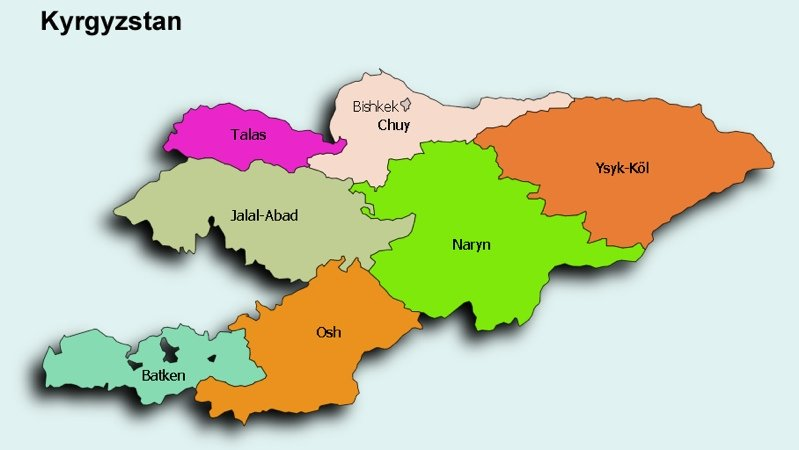

<Axes: xlabel='oral_read_score_pcnt', ylabel='invent_word_score_pcnt'>

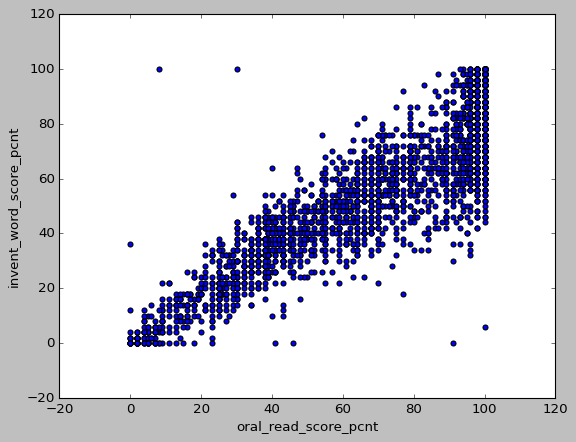

In [39]:
ps3.plot(x='oral_read_score_pcnt',y='invent_word_score_pcnt', kind='scatter')

<Axes: title={'center': 'Bishkek reading vs invented word scores'}, xlabel='oral_read_score_pcnt', ylabel='invent_word_score_pcnt'>

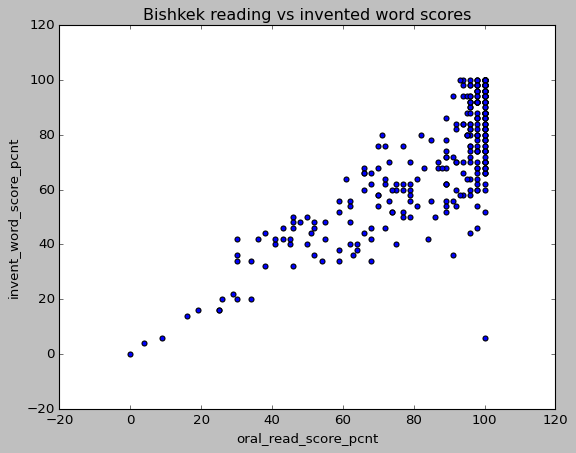

In [40]:
ps3[ps3['region'] == 'Bishkek'].plot(x='oral_read_score_pcnt',y='invent_word_score_pcnt', kind='scatter', title='Bishkek reading vs invented word scores')


<Axes: title={'center': "Osh's reading vs invented word scores"}, xlabel='oral_read_score_pcnt', ylabel='invent_word_score_pcnt'>

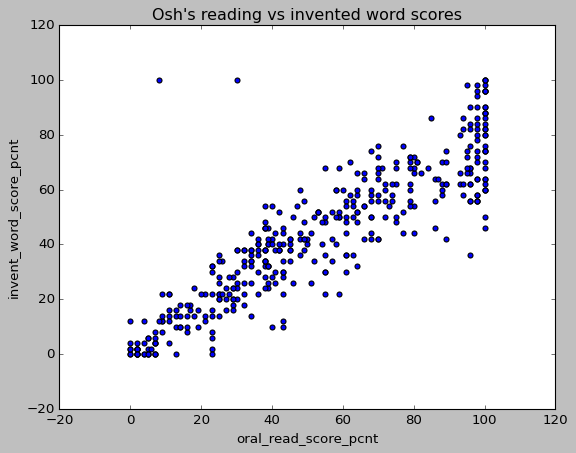

In [41]:
ps3[ps3['region'] == 'Osh'].plot(x='oral_read_score_pcnt',y='invent_word_score_pcnt', kind='scatter', title="Osh's reading vs invented word scores")

<Axes: title={'center': 'Female Reading vs Inventing Word Scores'}, xlabel='oral_read_score_pcnt', ylabel='invent_word_score_pcnt'>

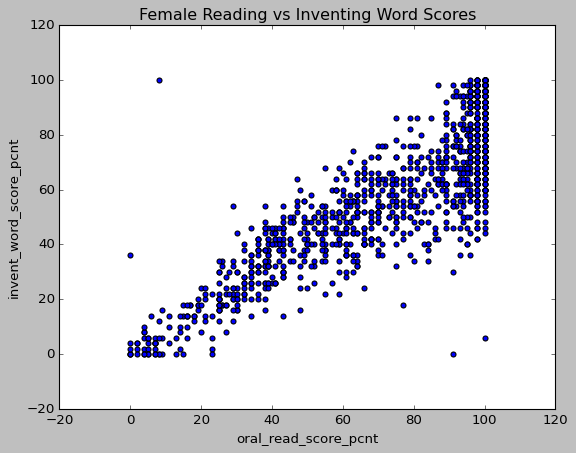

In [42]:
ps3[ps3['female']=='Female'].plot(x='oral_read_score_pcnt', y='invent_word_score_pcnt', kind='scatter', title='Female Reading vs Inventing Word Scores')

<Axes: title={'center': 'Female Reading vs Inventing Word Scores'}, xlabel='oral_read_score_pcnt', ylabel='invent_word_score_pcnt'>

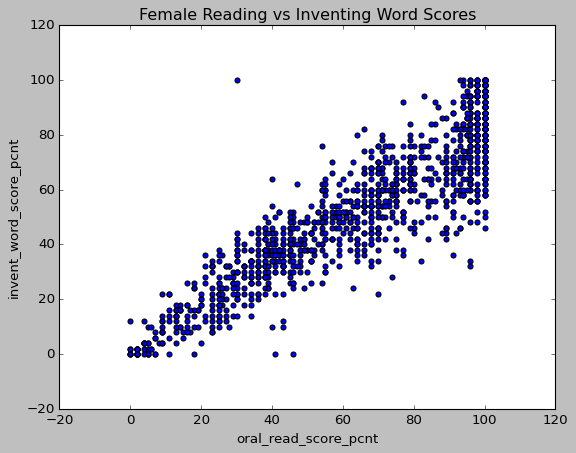

In [43]:
ps3[ps3['female']=='Male'].plot(x='oral_read_score_pcnt', y='invent_word_score_pcnt', kind='scatter', title='Female Reading vs Inventing Word Scores')

Ok! This is showing the relationship between oral reading score percentage test results vs invented reading score test results.
Not surprisingly, it seems to all go upwards. Students who did well on one literacy subtask tend to do well on the other. Few outliers here and there that are interesting , especially the one who got hte invented word reading score perfectly, but only got 20% on oral reading.

Likely, this comes back to the question and issue of fluency vs comprehension.

Text(0.5, 0, 'math scores')

Text(0, 0.5, 'count')

Text(0.5, 1.0, 'Total Math Score Distribution')

(array([ 63.,  78., 172., 178., 254., 284., 448., 352., 262., 208.]),
 array([  6. ,  15.4,  24.8,  34.2,  43.6,  53. ,  62.4,  71.8,  81.2,
         90.6, 100. ]),
 <BarContainer object of 10 artists>)

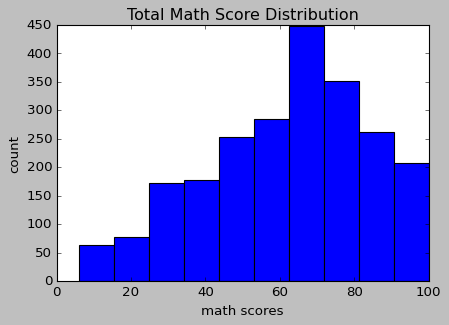

In [44]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set_xlabel('math scores')
ax.set_ylabel('count')
ax.set_title('Total Math Score Distribution')

ax.hist(ps3.g2_math_overall_score_pcnt)

Just getting an idea of total math scores to see the spread and results here. Seems that this is slightly skewed to higher performance, but pretty close to a standard distribution. We'd want to see this be more skewed to the right since this a foundational assessment of at level skills.

<Axes: title={'center': 'Male Math Scores Distribution'}, ylabel='Frequency'>

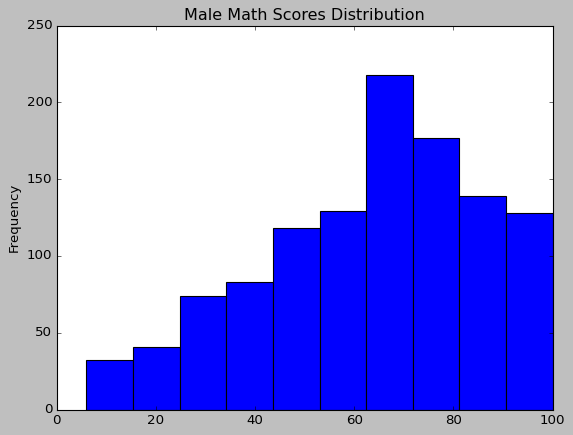

In [45]:
ps3[ps3['female']=='Male']['g2_math_overall_score_pcnt'].plot(kind='hist', title = 'Male Math Scores Distribution')

Text(0.5, 0, 'math scores')

Text(0, 0.5, 'count')

Text(0.5, 1.0, 'Female Math Scores Distribution')

(array([ 31.,  37.,  98.,  95., 136., 155., 230., 175., 123.,  80.]),
 array([  6. ,  15.4,  24.8,  34.2,  43.6,  53. ,  62.4,  71.8,  81.2,
         90.6, 100. ]),
 <BarContainer object of 10 artists>)

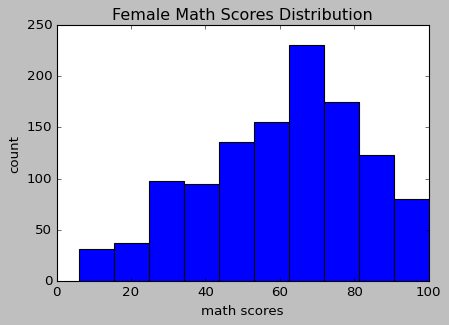

In [46]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set_xlabel('math scores')
ax.set_ylabel('count')
ax.set_title('Female Math Scores Distribution')
ax.hist(ps3[ps3['female']=='Female'].g2_math_overall_score_pcnt, bins=10)

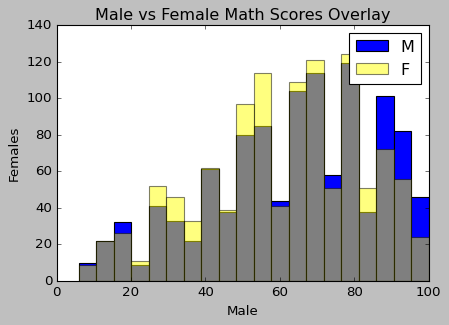

In [47]:
#overlays; super simple: just keep on adding plots
fig, ax = plt.subplots(figsize = (6,4))
ax.set_xlabel("Male")
ax.set_ylabel("Females")
ax.set_title('Male vs Female Math Scores Overlay')
#plot1
ax.hist(ps3.g2_math_overall_score_pcnt[ps3.female=="Male"],label="M", alpha=1,bins=20,color='blue')
#plot2
ax.hist(ps3.g2_math_overall_score_pcnt[ps3.female=="Female"] ,label="F", alpha=.5,bins=20,color='yellow')
ax.legend();

While the direction of the histograms as a whole are both right skewed, there's a clear indication that males did better than females at the higher end of the tail.

In [48]:
(ps3['oral_read_score_pcnt'] > 100).any()  # Returns True if any value is greater than 100, otherwise False
(ps3['read_comp_score_pcnt'] > 100).any()  # Returns True if any value is greater than 100, otherwise False
#ok. we don't have any values greater than 100. the scale showing 120 on the axis below on my scatter plot
#is just an auto adjustment for visibilty

np.False_

np.False_

In [49]:
ps3['oral_read_score_pcnt'].dtype
#no issue with data types

dtype('int64')

In [50]:
#reviewing distribution
ps3.groupby(['language', 'region']).size().reset_index(name='count')
#limited kyrgyz in Osh City and Naryn, worth considering...


language      region  count
0    Kyrgyz      Batken    140
1    Kyrgyz     Bishkek    129
2    Kyrgyz        Chui    197
3    Kyrgyz   Issyk-Kul    166
4    Kyrgyz  Jalal_Abad    311
5    Kyrgyz       Naryn     80
6    Kyrgyz         Osh    283
7    Kyrgyz    Osh_city     19
8    Kyrgyz       Talas    100
9   Russian      Batken     38
10  Russian     Bishkek    189
11  Russian        Chui    144
12  Russian   Issyk-Kul     64
13  Russian  Jalal_Abad    159
14  Russian       Naryn     16
15  Russian         Osh    114
16  Russian    Osh_city    110
17  Russian       Talas     40

<Axes: title={'center': ' Batken fluency vs comprehension'}, xlabel='oral_read_score_pcnt', ylabel='read_comp_score_pcnt'>

<Axes: title={'center': ' Bishkek fluency vs comprehension'}, xlabel='oral_read_score_pcnt', ylabel='read_comp_score_pcnt'>

<Axes: title={'center': ' Chui fluency vs comprehension'}, xlabel='oral_read_score_pcnt', ylabel='read_comp_score_pcnt'>

<Axes: title={'center': ' Issyk-Kul fluency vs comprehension'}, xlabel='oral_read_score_pcnt', ylabel='read_comp_score_pcnt'>

<Axes: title={'center': ' Jalal_Abad fluency vs comprehension'}, xlabel='oral_read_score_pcnt', ylabel='read_comp_score_pcnt'>

<Axes: title={'center': ' Naryn fluency vs comprehension'}, xlabel='oral_read_score_pcnt', ylabel='read_comp_score_pcnt'>

<Axes: title={'center': ' Osh fluency vs comprehension'}, xlabel='oral_read_score_pcnt', ylabel='read_comp_score_pcnt'>

<Axes: title={'center': ' Osh_city fluency vs comprehension'}, xlabel='oral_read_score_pcnt', ylabel='read_comp_score_pcnt'>

<Axes: title={'center': ' Talas fluency vs comprehension'}, xlabel='oral_read_score_pcnt', ylabel='read_comp_score_pcnt'>

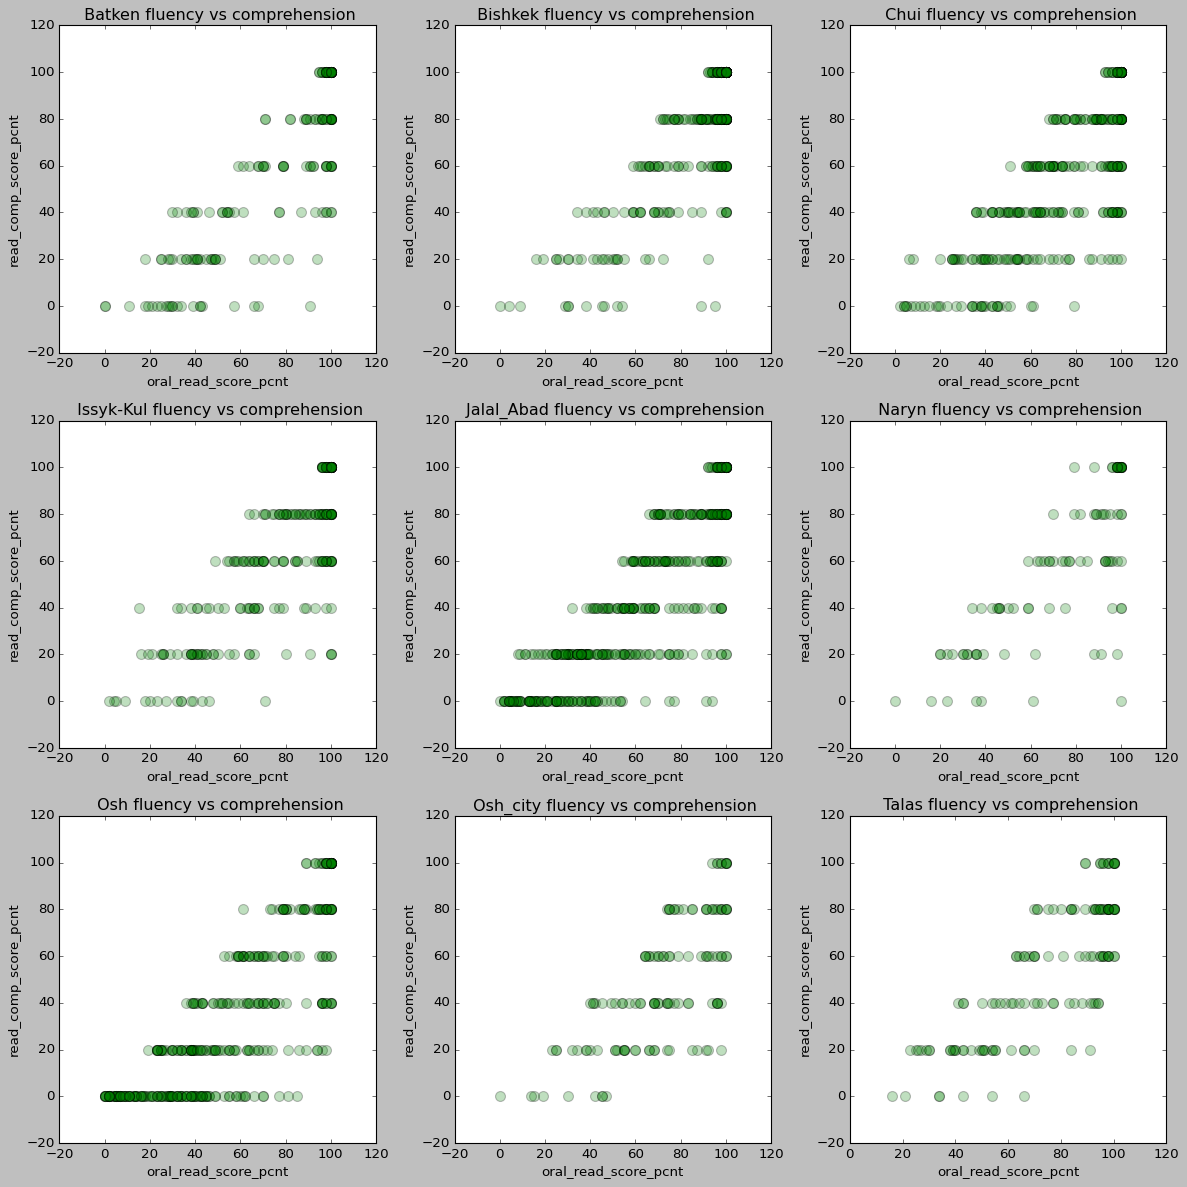

In [51]:
#setup
regions = ps3['region'].unique()
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

#iteration
for ax, region in zip(axes, regions):
    regionunique=ps3[ps3['region']==region]
    regionunique.plot(
      x='oral_read_score_pcnt',
      y='read_comp_score_pcnt',
      kind='scatter',
      title=f' {region} fluency vs comprehension',
      c='green',
      s=80,
      alpha=.25,
      ax=ax)

plt.tight_layout()
plt.show()

  #practicing running all of these with an iterative loop by region

Well, this is what happens when we are comparing two scales of items that are scored in 20% percentiles. This seems to skew, ever so slightly, upwards and to the right. But perhaps not the best graph for this!
Osh, Jalal Abad and Chui seem to be a bit more skewed to lower performance. interesting.

<Axes: title={'center': "Histogram for Batken's Oral Reading Scores"}, ylabel='Frequency'>

Text(0.5, 0, 'Score Percentage')

Text(0, 0.5, 'Frequency')

<Axes: title={'center': "Histogram for Bishkek's Oral Reading Scores"}, ylabel='Frequency'>

Text(0.5, 0, 'Score Percentage')

Text(0, 0.5, 'Frequency')

<Axes: title={'center': "Histogram for Chui's Oral Reading Scores"}, ylabel='Frequency'>

Text(0.5, 0, 'Score Percentage')

Text(0, 0.5, 'Frequency')

<Axes: title={'center': "Histogram for Issyk-Kul's Oral Reading Scores"}, ylabel='Frequency'>

Text(0.5, 0, 'Score Percentage')

Text(0, 0.5, 'Frequency')

<Axes: title={'center': "Histogram for Jalal_Abad's Oral Reading Scores"}, ylabel='Frequency'>

Text(0.5, 0, 'Score Percentage')

Text(0, 0.5, 'Frequency')

<Axes: title={'center': "Histogram for Naryn's Oral Reading Scores"}, ylabel='Frequency'>

Text(0.5, 0, 'Score Percentage')

Text(0, 0.5, 'Frequency')

<Axes: title={'center': "Histogram for Osh's Oral Reading Scores"}, ylabel='Frequency'>

Text(0.5, 0, 'Score Percentage')

Text(0, 0.5, 'Frequency')

<Axes: title={'center': "Histogram for Osh_city's Oral Reading Scores"}, ylabel='Frequency'>

Text(0.5, 0, 'Score Percentage')

Text(0, 0.5, 'Frequency')

<Axes: title={'center': "Histogram for Talas's Oral Reading Scores"}, ylabel='Frequency'>

Text(0.5, 0, 'Score Percentage')

Text(0, 0.5, 'Frequency')

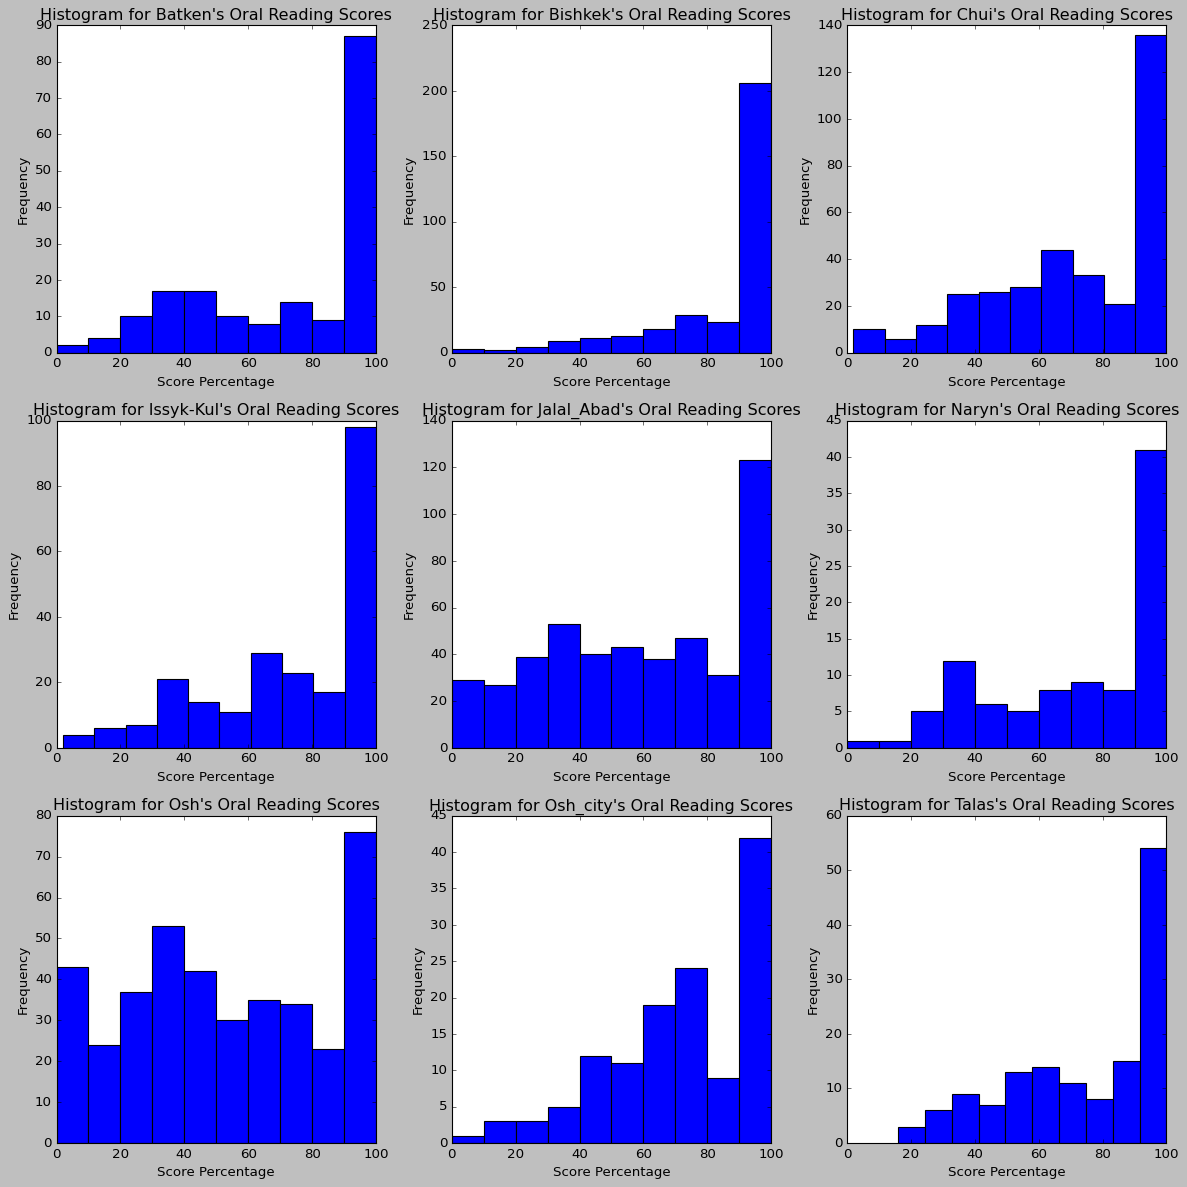

In [52]:
# Get unique regions - used chat gpt for thsi one to figure out how to get it all to fit.
regions = ps3['region'].unique()

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()  # Flatten to easily iterate over all axes

# Loop through each region and corresponding subplot axis
for ax, region in zip(axes, regions):
    regionunique2 = ps3[ps3['region'] == region]
    regionunique2['oral_read_score_pcnt'].plot(
        kind='hist',
        ax=ax,
        title=f'Histogram for {region}\'s Oral Reading Scores',
        color='blue',
        edgecolor='black'
    )
    ax.set_xlabel('Score Percentage')
    ax.set_ylabel('Frequency')


plt.tight_layout()
plt.show()

  #practicing running all of these with an iterative loop by region

It's a nice mix betweeen some regions having a normal distribution and some being skewed to the right.

<Axes: xlabel='region'>

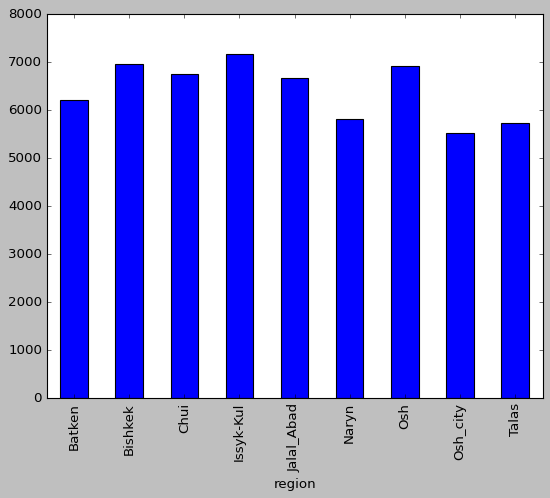

In [53]:
# Compute mean income and population by region
popincome = ps3.groupby('region')[['income_2021', 'pop']].mean()
popincome.income_2021.plot(kind='bar')


This is interesting, only in so far as telling me that the per capita income from the Kyrgyz Bureau of Statistics isn't telling the full story. There are massive income differentials between Bishkek and the rest. Something's suspect!

In [54]:
popincome

income_2021   pop
region                       
Batken           6205.4  0.45
Bishkek          6946.2  1.53
Chui             6755.1  0.93
Issyk-Kul        7173.2  0.54
Jalal_Abad       6672.2  0.96
Naryn            5808.8  0.31
Osh              6922.4  1.70
Osh_city         5523.1  1.70
Talas            5732.5  0.26

In [55]:
heatmap_data = ps3.groupby(['region','language']).agg({'g2_math_overall_score_pcnt': 'mean'}).reset_index()  # Reset the index to make 'region' and 'language' as columns
heatmap_data

region language  g2_math_overall_score_pcnt
0       Batken   Kyrgyz                   59.907143
1       Batken  Russian                   46.394737
2      Bishkek   Kyrgyz                   68.720930
3      Bishkek  Russian                   71.904762
4         Chui   Kyrgyz                   73.913706
5         Chui  Russian                   54.500000
6    Issyk-Kul   Kyrgyz                   61.530120
7    Issyk-Kul  Russian                   62.156250
8   Jalal_Abad   Kyrgyz                   66.315113
9   Jalal_Abad  Russian                   57.226415
10       Naryn   Kyrgyz                   64.025000
11       Naryn  Russian                   71.562500
12         Osh   Kyrgyz                   53.431095
13         Osh  Russian                   42.789474
14    Osh_city   Kyrgyz                   72.736842
15    Osh_city  Russian                   63.700000
16       Talas   Kyrgyz                   64.950000
17       Talas  Russian                   61.625000

<Figure size 800x480 with 0 Axes>

<Axes: xlabel='language', ylabel='region'>

Text(0.5, 1.0, 'Heatmap: Grade 2 Math Score by Region & Language')

Text(0.5, 24.999999999999986, 'Language')

Text(77.0, 0.5, 'Region')

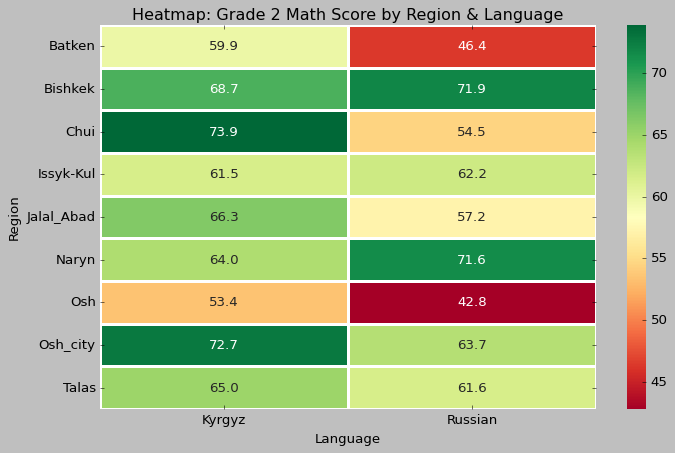

In [56]:
heatmap_pivot = heatmap_data.pivot(
    index="region",
    columns="language",
    values="g2_math_overall_score_pcnt"  # Use the correct column name for values
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_pivot, annot=True, cmap="RdYlGn", fmt=".1f", linewidths=1)

plt.title("Heatmap: Grade 2 Math Score by Region & Language")
plt.xlabel("Language")
plt.ylabel("Region")

plt.show()

Math scores seem to show that those who took the test in the regions tend to do worse than their Kyrgyz language counterparts. This seems to indicate that perhaps Kyrgyz language instruction is much better for math results and foundational learning outcomes! It's worth noting the highest average scores are in Chui for Kyrgyz. Bishkek did well across the board. Chui and Batken are perhaps the most interesting.

In [57]:
readmap = ps3.groupby(['region', 'language']).agg({'oral_read_score_pcnt':'mean'}).reset_index()
readmap



region language  oral_read_score_pcnt
0       Batken   Kyrgyz             78.714286
1       Batken  Russian             54.210526
2      Bishkek   Kyrgyz             78.658915
3      Bishkek  Russian             90.301587
4         Chui   Kyrgyz             71.761421
5         Chui  Russian             72.763889
6    Issyk-Kul   Kyrgyz             76.132530
7    Issyk-Kul  Russian             70.046875
8   Jalal_Abad   Kyrgyz             58.678457
9   Jalal_Abad  Russian             61.773585
10       Naryn   Kyrgyz             70.550000
11       Naryn  Russian             83.125000
12         Osh   Kyrgyz             54.583039
13         Osh  Russian             48.842105
14    Osh_city   Kyrgyz             69.842105
15    Osh_city  Russian             71.863636
16       Talas   Kyrgyz             74.490000
17       Talas  Russian             73.950000

<Figure size 800x480 with 0 Axes>

<Axes: xlabel='language', ylabel='region'>

Text(0.5, 1.0, 'Heatmap: Oral Grade 2 Reading Score by Region & Language')

Text(0.5, 24.999999999999986, 'Language')

Text(77.0, 0.5, 'Region')

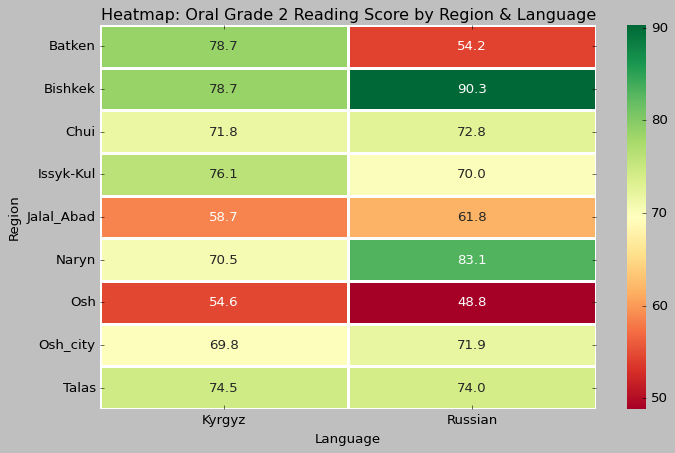

In [58]:
readmap_pivot=readmap.pivot(
      index='region',
      columns='language',
      values='oral_read_score_pcnt'
)
plt.figure(figsize=(10,6))
sns.heatmap(readmap_pivot, annot=True, cmap='RdYlGn', fmt=".1f", linewidths=1)
plt.title("Heatmap: Oral Grade 2 Reading Score by Region & Language")
plt.xlabel("Language")
plt.ylabel("Region")
plt.show()

Oral reading score percentages are interesting. Batken russian language instruction is not appearing to be overly effective compared to Kyrgyz instruction. Bishkek shows much higher results in Russian! Across the board, we're seeing poorer russian results in the more rural regions, and over/out performance in Bishkek . Naryn is an interesting case study showing fair results in Kyrgyz, but a 13.1 point difference in Russian. Worth looking into!

In [59]:
inventmap = ps3.groupby(['region','language']).agg({'invent_word_score_pcnt': 'mean'}).reset_index()  # Reset the index to make 'region' and 'language' as columns
inventmap

region language  invent_word_score_pcnt
0       Batken   Kyrgyz               62.857143
1       Batken  Russian               47.368421
2      Bishkek   Kyrgyz               66.232558
3      Bishkek  Russian               76.571429
4         Chui   Kyrgyz               58.873096
5         Chui  Russian               61.500000
6    Issyk-Kul   Kyrgyz               57.975904
7    Issyk-Kul  Russian               58.375000
8   Jalal_Abad   Kyrgyz               46.469453
9   Jalal_Abad  Russian               51.509434
10       Naryn   Kyrgyz               55.550000
11       Naryn  Russian               67.875000
12         Osh   Kyrgyz               43.060071
13         Osh  Russian               44.245614
14    Osh_city   Kyrgyz               54.526316
15    Osh_city  Russian               59.636364
16       Talas   Kyrgyz               57.280000
17       Talas  Russian               60.000000

<Figure size 800x480 with 0 Axes>

<Axes: xlabel='language', ylabel='region'>

Text(0.5, 1.0, 'Heatmap: Invent Map Grade 2 by Region & Language')

Text(0.5, 24.999999999999986, 'Language')

Text(77.0, 0.5, 'Region')

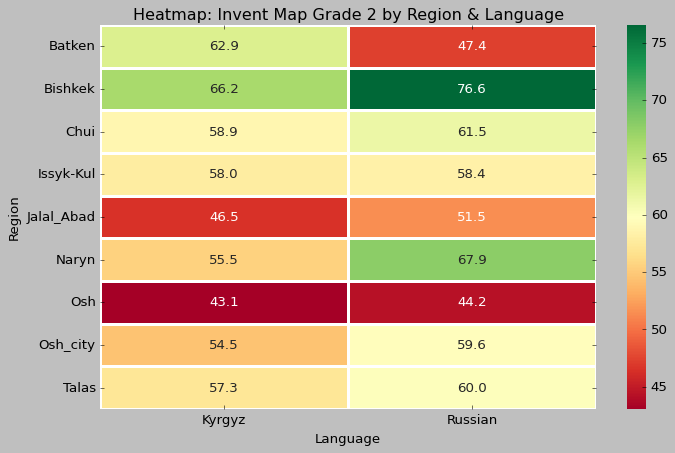

In [60]:
invmappiv=inventmap.pivot(
      index='region',
      columns='language',
      values='invent_word_score_pcnt'
)
plt.figure(figsize=(10,6))
sns.heatmap(invmappiv, annot=True, cmap='RdYlGn', fmt=".1f", linewidths=1)
plt.title("Heatmap: Invent Map Grade 2 by Region & Language")
plt.xlabel("Language")
plt.ylabel("Region")
plt.show()

The invented word subtask tests a child's ability to sound out and read a made up word using the phonological rules for the language.  
What we see is a similar spread: Better performance in Batken in Kyrgyz as opposed to Russian.  good results in Bishkek in Kyrgyz but especially strong results in Russian.
Naryn also shows a similar trend of doing better in Russian as opposed to Kyrgyz. Could it be the nature of the random sampling of schools that were reviewed? Or is there something else going on? Naryn is more central. Batken is to the far south west where there is less Russian access and penetration

<Figure size 800x480 with 0 Axes>

<Axes: xlabel='language', ylabel='region'>

Text(0.5, 1.0, 'NST average score by Language')

Text(0.5, 24.999999999999986, 'language')

Text(77.0, 0.5, 'region')

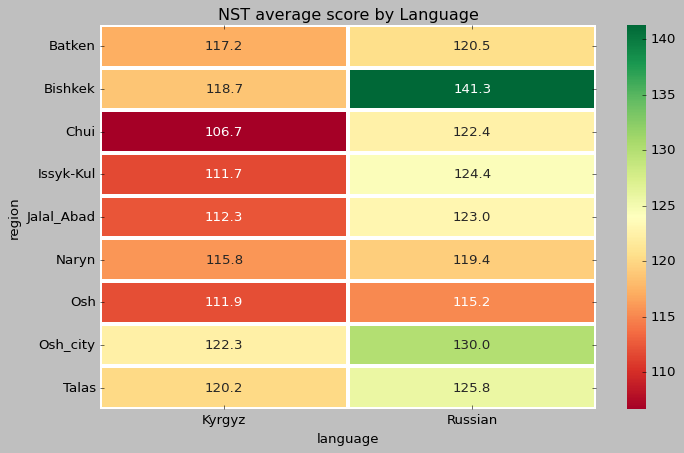

In [61]:
nsttest = ps3.groupby(['region', 'language']).agg({'Avg_score': 'mean'}).reset_index()
nsttestpiv=nsttest.pivot(
    index = 'region',
    columns = 'language',
    values = 'Avg_score'
)
plt.figure(figsize=(10,6))
sns.heatmap(nsttestpiv, annot=True, cmap='RdYlGn', fmt=".1f", linewidths=2)
plt.title("NST average score by Language")
plt.xlabel("language")
plt.ylabel("region")
plt.show()


In [62]:
nstdata = ps3.groupby(['region', 'language']).agg({'Award_average': 'mean'}).reset_index()
nstdata


region language  Award_average
0       Batken   Kyrgyz          145.8
1       Batken  Russian          148.6
2      Bishkek   Kyrgyz          149.5
3      Bishkek  Russian          164.6
4         Chui   Kyrgyz          137.0
5         Chui  Russian          150.6
6    Issyk-Kul   Kyrgyz          141.2
7    Issyk-Kul  Russian          147.4
8   Jalal_Abad   Kyrgyz          143.2
9   Jalal_Abad  Russian          155.5
10       Naryn   Kyrgyz          143.8
11       Naryn  Russian          142.6
12         Osh   Kyrgyz          146.0
13         Osh  Russian          154.7
14    Osh_city   Kyrgyz          156.2
15    Osh_city  Russian          162.7
16       Talas   Kyrgyz          146.9
17       Talas  Russian          151.2

<Figure size 800x480 with 0 Axes>

<Axes: xlabel='language', ylabel='region'>

Text(0.5, 1.0, 'NST Awards by Language')

Text(0.5, 24.999999999999986, 'Language')

Text(77.0, 0.5, 'Region')

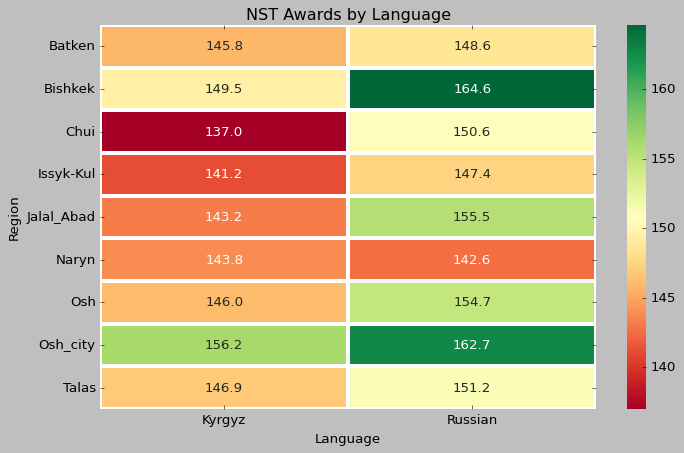

In [63]:
nstpiv=nstdata.pivot(
      index='region',
      columns='language',
      values='Award_average'
)
plt.figure(figsize=(10,6))
sns.heatmap(nstpiv, annot=True, cmap='RdYlGn', fmt=".1f", linewidths=2)
plt.title("NST Awards by Language")
plt.xlabel("Language")
plt.ylabel("Region")
plt.show()

So! What's the takeaway with the National Scholarship Test scores?
Results in Russian are typically better, both on average and for those who are awarded.
Prior calculations shown (will graph this later!) indicate that there is a higher likelyhood of a Kyrgyz test taker, with a lower score, successfully receiving a scholarship. Researchers noted that 1) quotas and 2) high scoring students may both seek outside opportunities if not awarded a scholarship to a top university in higher paying disciplines.
I would say, from a glance, that these two heatmaps show that the conclusions from Shamatov and Bahry's study on NST test results in 2017 stay true. Higher educational results and outcomes are seen coming from Bishkek and Osh city, urban centers and unique administrative regions with higher opportunities.

<Axes: >

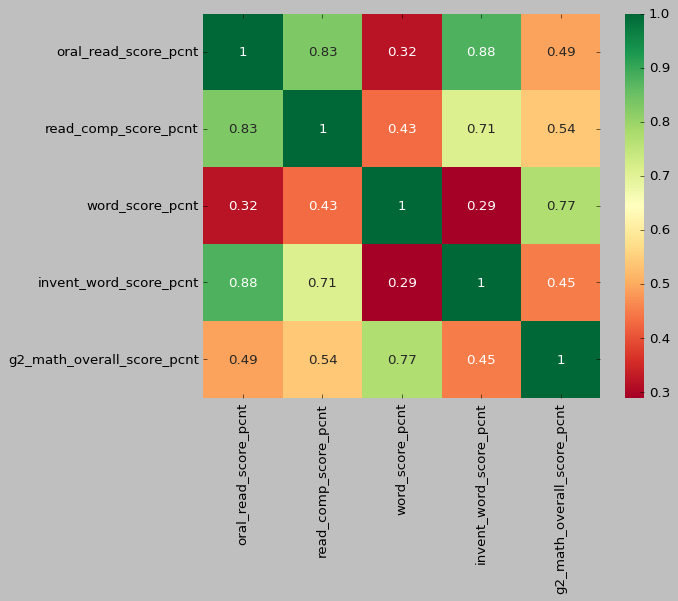

In [64]:
sns.heatmap(ps3[['oral_read_score_pcnt','read_comp_score_pcnt','word_score_pcnt','invent_word_score_pcnt','g2_math_overall_score_pcnt']].corr().round(2),cmap="RdYlGn",annot=True) # RdYlGn love the colors!

#PS3 Visuals
1. tell a story with vis, say 1-10 graphs, the fewer the better!, focus on what the data are telling us, make it engaging and
utilitarian/useful
2. don’t overcomplicate, best stories are simple (but be thorough, do the work, do robustness checks, triangulate, etc–all of that
in notebook, but then the story you tell and present is basic and simple, top of the iceberg, the choisest, the cream of the
crop)–its like top research say in nature or science–it’s a page or two (but its based on say 20 or 50 pages of output in appendix
or supplementray material)
3. bar is higher than ps2

In [65]:
ps3

region      district language urbanrural  female  age  g2_year  \
0     Batken  Кадамжайский   Kyrgyz      Rural    Male    8     2021   
1     Batken  Кадамжайский   Kyrgyz      Rural    Male    9     2021   
2     Batken  Кадамжайский   Kyrgyz      Rural    Male    8     2021   
3     Batken  Кадамжайский   Kyrgyz      Rural  Female    9     2021   
4     Batken  Кадамжайский   Kyrgyz      Rural    Male    8     2021   
...      ...           ...      ...        ...     ...  ...      ...   
2294   Talas     Таласский  Russian      Urban  Female    9     2021   
2295   Talas     Таласский  Russian      Urban    Male    9     2021   
2296   Talas     Таласский  Russian      Urban    Male    8     2021   
2297   Talas     Таласский  Russian      Urban    Male    8     2021   
2298   Talas     Таласский  Russian      Urban  Female    8     2021   

      oral_read_score_pcnt  oral_read_attempted_pcnt  read_comp_score_pcnt  \
0                       54                       100                    40   
1                       18                        59                     0   
2                      100                       100                   100   
3                       98                        98                    80   
4                       68                        95                    60   
...                    ...                       ...                   ...   
2294                   100                       100                   100   
2295                    77                        95                    40   
2296                    70                        90                    60   
2297                    85                       100                    40   
2298                    89                        89                   100   

      word_score  word_score_pcnt  invent_word_score_pcnt  \
0              6              100                      54   
1              3               50                      10   
2              3               50                      58   
3              3               50                      80   
4              6              100                      68   
...          ...              ...                     ...   
2294           5               83                      98   
2295           5               83                      52   
2296           4               67                      54   
2297           3               50                      68   
2298           3               50                      84   

      g2_math_overall_score_pcnt  Avg_score  Award_average  Total_quantity  \
0                             74      117.2          145.8            2830   
1                             40      117.2          145.8            2830   
2                             63      117.2          145.8            2830   
3                             69      117.2          145.8            2830   
4                             83      117.2          145.8            2830   
...                          ...        ...            ...             ...   
2294                          97      125.8          151.2             343   
2295                          77      125.8          151.2             343   
2296                          86      125.8          151.2             343   
2297                          80      125.8          151.2             343   
2298                          51      125.8          151.2             343   

      Award_quantity  Earthquake  Flood  Landslide  Drought  Natural  \
0                409         5.4    5.7        7.5      7.2      6.5   
1                409         5.4    5.7        7.5      7.2      6.5   
2                409         5.4    5.7        7.5      7.2      6.5   
3                409         5.4    5.7        7.5      7.2      6.5   
4                409         5.4    5.7        7.5      7.2      6.5   
...              ...         ...    ...        ...      ...      ...   
2294              37         5

In [66]:
import plotly.express as px

# Define the score columns
score_cols = ["oral_read_score_pcnt", "read_comp_score_pcnt", "word_score_pcnt", "invent_word_score_pcnt","g2_math_overall_score_pcnt"]

# Iterate over each region and generate a radar chart
regions = ps3["region"].unique()  # Get unique region names

for region in regions:
    # Filter the dataframe for the current region
    df_region = ps3[ps3["region"] == region][score_cols].mean()  # Take mean scores per region

    # Transform data for radar plot
    df_plot = pd.DataFrame(dict(
        r=df_region.values,  # Score values
        theta=df_region.index  # Score categories
    ))

    # Create radar chart
    fig = px.line_polar(df_plot, r='r', theta='theta', line_close=True, title=f"Region: {region}", range_r=[0, 100])
    fig.show()


##PS3 Web/Matrixes
These are cool little charts. I don't think I will actually use them for the capstone, but this is a really simple way to get an idea of what's happening, region by region, across all 5 subtasks in one graph!

I think with some overlay we'd be able to find a way to make these easier to compare in one view. I'll admit while this is neat, I think the violin charts (below) that I centered most of my time on provide a better overview, subtask by subtask. However, this is another cool way to slice things!

In [67]:
ps3.value_counts()

region      district       language  urbanrural  female  age  g2_year  oral_read_score_pcnt  oral_read_attempted_pcnt  read_comp_score_pcnt  word_score  word_score_pcnt  invent_word_score_pcnt  g2_math_overall_score_pcnt  Avg_score  Award_average  Total_quantity  Award_quantity  Earthquake  Flood  Landslide  Drought  Natural  award_percentage  natrisk   readingcomp  income_2021  pop 
Jalal_Abad  г. Жалал-Абад  Russian   Urban       Female  7    2021     55                    85                        40                    1           17               38                      23                          123.0      155.5          1214            91              9.4         7.3    9.4        9.3      9.0      0.074959          High      2.14         6672.2       0.96    2
            г. Таш-Комур   Russian   Rural       Female  9    2021     51                    96                        20                    1           17               40                      34                          123.0      155.5          1214            91              9.4         7.3    9.4        9.3      9.0      0.074959          High      2.14         6672.2       0.96    1
                                                 Male    8    2021     11                    35                        20                    1           17               14                      14                          123.0      155.5          1214            91              9.4         7.3    9.4        9.3      9.0      0.074959          High      2.14         6672.2       0.96    1
                                                                       55                    94                        20                    1           17               64                      63                          123.0      155.5          1214            91              9.4         7.3    9.4        9.3      9.0      0.074959          High      2.14         6672.2       0.96    1
                                                                       72                    95                        60                    4           67               70                      77                          123.0      155.5          1214            91              9.4         7.3    9.4        9.3      9.0      0.074959          High      2.14         6672.2       0.96    1
                                                                                                                                                                                                                                                                                                                                                                                                     ..
Chui        Ысык-Атинский  Kyrgyz    Rural       Male    7    2021     54                    100                       40                    5           83               50                      66                          106.7      137.0          2699            133             6.8         5.0    8.6        2.0      6.2      0.049278          Moderate  2.37         6755.1       0.93    1
                                                                       79                    100                       60                    6           100              84                      83                          106.7      137.0          2699            133             6.8         5.0    8.6        2.0      6.2      0.049278          Moderate  2.37         6755.1       0.93    1
                                                         8    2021     59                    97                        20                    3           50               50                      69                          106.7      137.0          2699            133             6.8         5.0    8.6        2.0      6.2      0.049278          Moderate  2.37         6755.1       0.93    1
                                                                       61            

In [68]:
# Define the subtask (column name)
subtask = "oral_read_score_pcnt"

# Filter dataframe for only this subtask
oralread = ps3[["region", subtask]].dropna()  # Remove missing values

# violin plot
fig = px.violin(oralread, x="region", y=subtask, color="region",
                box=True,  # to add mini box plot
                points="all",  # show every datapoint distributed
                title=f"Score Distribution for {subtask} Across Regions")

fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Score",
    legend_title="Region",
    paper_bgcolor="white",
    font=dict(color="black")
)


In [69]:
# Define the subtask (column name)
subtask2 = "read_comp_score_pcnt"

# Filter dataframe for only this subtask
readcomp = ps3[["region", subtask2]].dropna()

# Create the violin plot
fig = px.violin(readcomp, x="region", y=subtask2, color="region",
                box=True,
                points="all",
                title=f"Score Distribution for {subtask2} Across Regions")

# Customize appearance
fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Score",
    legend_title="Region",
    paper_bgcolor="white",
    font=dict(color="black")
)
plt.show()


In [70]:
# Define the subtask (column name)
subtask3 = "word_score_pcnt"

# Filter dataframe for only this subtask
wordscore = ps3[["region", subtask3]].dropna()  # Remove missing values

# Create the violin plot
fig = px.violin(wordscore, x="region", y=subtask3, color="region",
                box=True,  # Adds a mini box plot inside
                points="all",  # Show all data points
                title=f"Score Distribution for {subtask3} Across Regions")

# Customize appearance
fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Score",
    legend_title="Region",
    paper_bgcolor="white",
    font=dict(color="black")
)
plt.show()



In [71]:
# Define the subtask (column name)
subtask4 = "invent_word_score_pcnt"

# Filter dataframe for only this subtask
inventwordscore = ps3[["region", subtask4]].dropna()  # Remove missing values

# Create the violin plot
fig = px.violin(inventwordscore, x="region", y=subtask4, color="region",
                box=True,  # Adds a mini box plot inside
                points="all",  # Show all data points
                title=f"Score Distribution for {subtask4} Across Regions")

# Customize appearance
fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Score",
    legend_title="Region",
    paper_bgcolor="white",
    font=dict(color="black")
)
plt.show()


**Putting a break in here. For ease of reference I've just put the four graphs in one text document after downloading them as png's.**

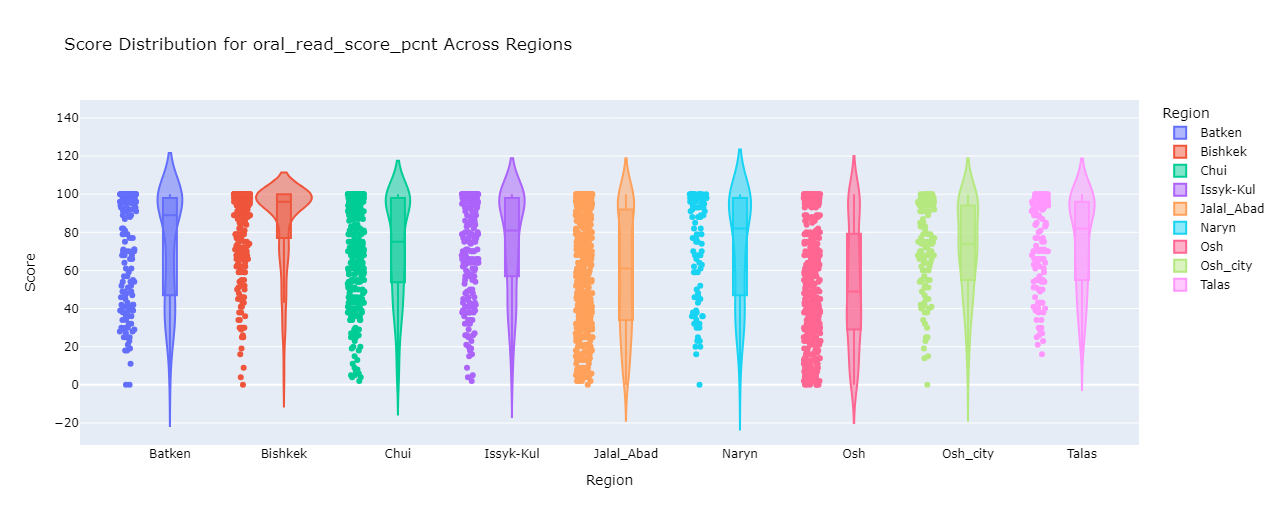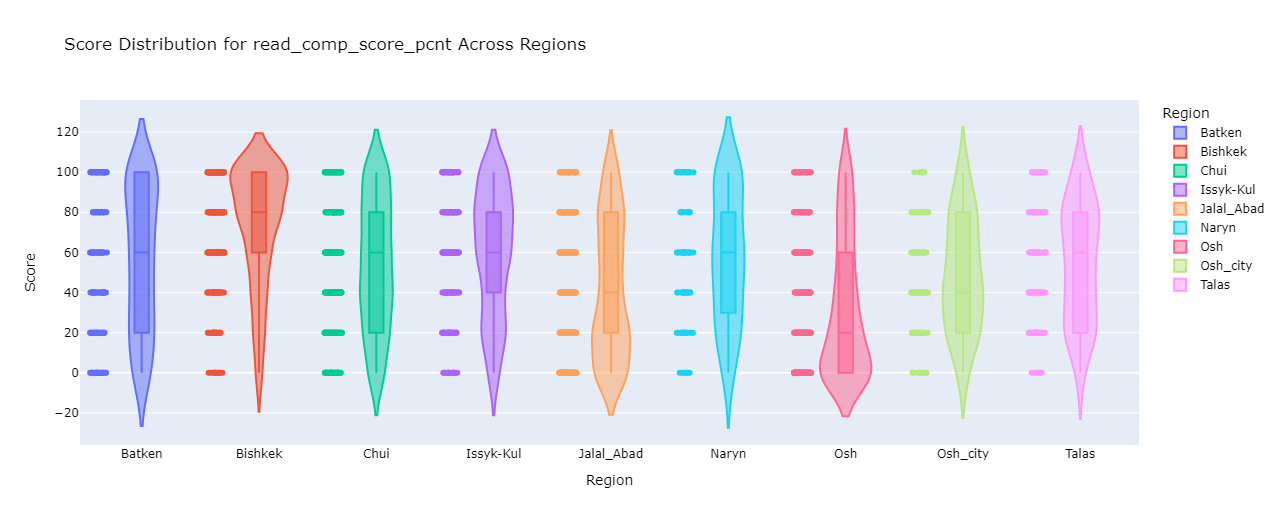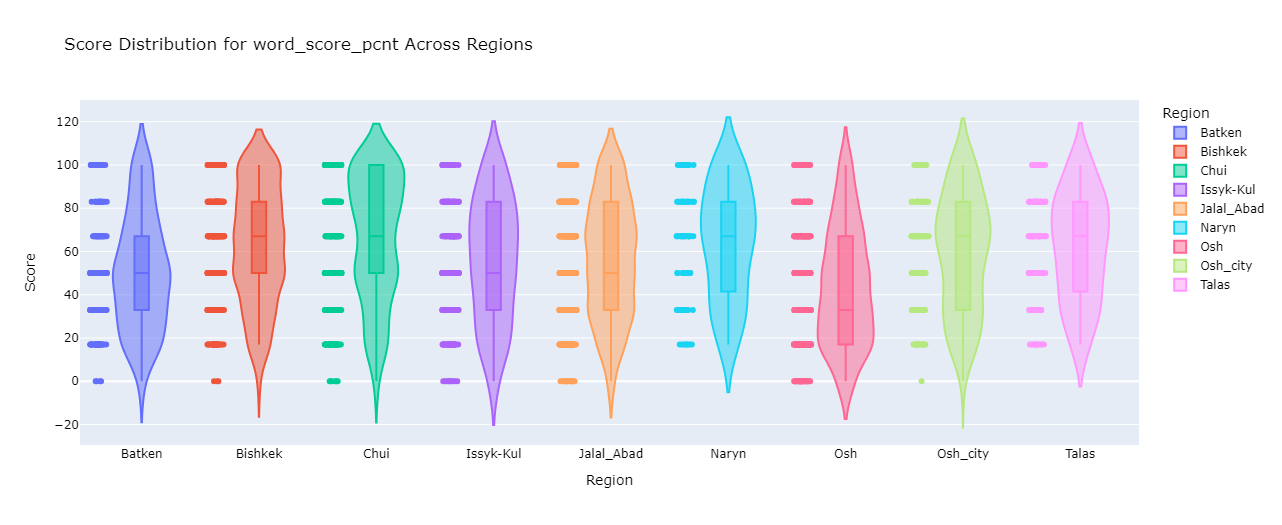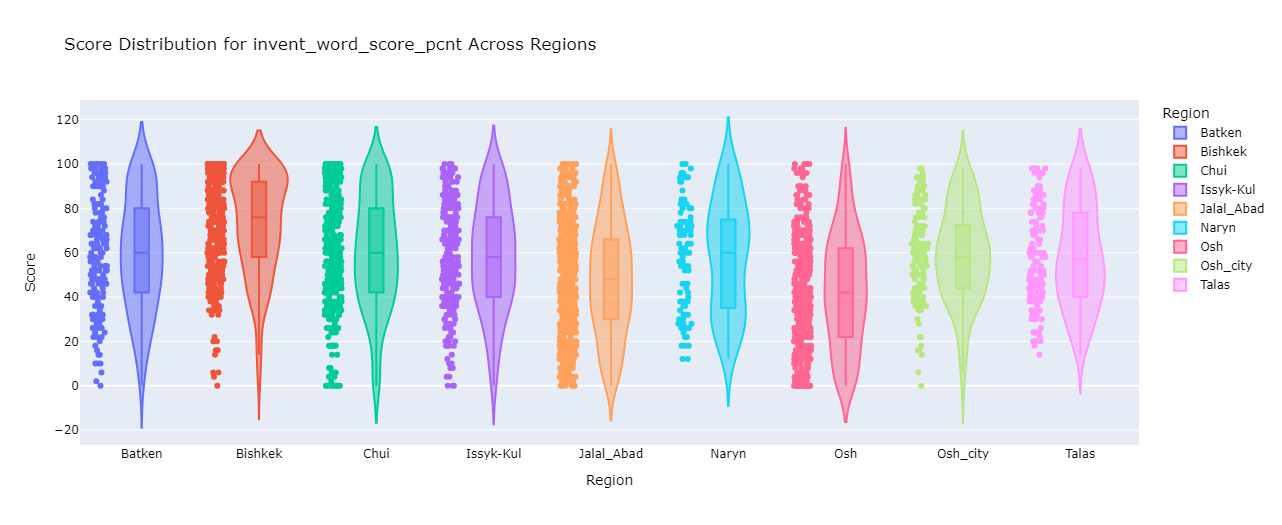

##PS3 visuals recap
For this problem set, I tried a few different graphs that I thought were interesting before settling on violin charts after seeing Erick's from the Data Management class.

I think these are fantastic tools for this study in particular, as I have 9 regions and four subtasks. Now we can take a look at the distribution and points, as well as a nifty boxplot for each one, region by region, and do some quick comparisons!

I did not do a breakout by language, thinking that those visuals can be used in PS4. However, if someone asked me to share the overall image of "what's happening in each region" I think putting these four charts side by side for the 2,299 respondents will be great.

**noting; I think I will be going back to the dataset and bringing the Uzbek and Tajik respondents back for my final datasets and final analysis!

##Oral Reading Score Review
We can see that Bishkek has one heck of a tail at the upper end, almost looks like a glassblowers pipe! And the box plot is super tight!

Other regions have similar candles, with the distribution towards the top.
The interesting outliers here appear to be Jalal-Abad, Osh, and Osh City. These three , in reviewing the box plot, have a much wider range and we can see don't have the "tail" appearing at the end of the violin chart. Definitely something up with these three regions as a whole!



##Reading Comp Score Review
Reading comprehension followed the story/oral reading score.
If students did not fail to read the first line of words, they would be asked questions. If they did not reach certain parts of the story in time, they might not be asked certain questions.
We would expect, roughly, that reading comprehension to fall in line with the oral reading score. We can see however the tails are way smoother and far more evenly distributed!

Osh, Talas, and Jalal Abad show a strong concentration and grouping at the bottom of the violin chart. Osh especially is showing some interesting, and perhaps troubling, results. The other regions appear to have a more normal distribution in comparison.

##Word Score Pcnt
This subtask involved silent reading comprehension.
We're seeing similar patterns to the prior two. However, a really, really interesting note is that the students in Chui seemed to have done far better than all the other regions, even Bishkek, which did an amazing job on the oral reading and oral reading comprehension questions compared to the other regions.



##Invented Word
This is also similar to what we'd seen before.  and Bishkek is back to reigning supreme.

## PS3 - let's backpedal a moment
Looking into Osh, Osh City, and Jalal-Abad, I realized I made a mistake in my approach!

In my data management class, I had taken the EGRA data and dropped the minority language results (uzbek and tajik) as the two official languages in the country are Kyrgyz and Russian.

One of the first questions I had after reviewing these violin charts, and managed to look into today was what is the demographic breakdown in each region. Literature notes a clear North/South split, with several enclaves, exclaves, and larger populations from minority groups in the south due to territorial and histoirical border decisions made during the time of the USSR.

Lo and behold, looking at the demographic data gives us the following!

All data pulled from this report:  https://stat.gov.kg/media/publicationarchive/fa3392ca-c76e-456f-badd-7a324ff5204d.pdf

In [72]:
!wget --no-check-certificate 'https://docs.google.com/spreadsheets/d/1VFWYVpyJupVrJ3E0jATUN6Bxqan6UTAinK8N_3CmgRg/export?format=csv' -O moesreport.csv


--2025-04-03 21:56:32--  https://docs.google.com/spreadsheets/d/1VFWYVpyJupVrJ3E0jATUN6Bxqan6UTAinK8N_3CmgRg/export?format=csv
Resolving docs.google.com (docs.google.com)... 172.217.214.138, 172.217.214.139, 172.217.214.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.214.138|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0c-7s-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/tpuc7qtvscbqipkcpcfmc8qslg/1743717390000/113781219181981321798/*/1VFWYVpyJupVrJ3E0jATUN6Bxqan6UTAinK8N_3CmgRg?format=csv [following]
--2025-04-03 21:56:32--  https://doc-0c-7s-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/tpuc7qtvscbqipkcpcfmc8qslg/1743717390000/113781219181981321798/*/1VFWYVpyJupVrJ3E0jATUN6Bxqan6UTAinK8N_3CmgRg?format=csv
Resolving doc-0c-7s-sheets.googleusercontent.com (doc-0c-7s-sheets.googleusercontent.com)... 142.250.125.132, 2607:f8b0:4001:c2f::84
Connecting to doc-0c-7s-sheets.googleuser

In [73]:
moes = pd.read_csv('moesreport.csv')
moes.drop(columns=['Unnamed: 0'], inplace=True)
moes.head()

Ethnicity Total Population   Batken Jalal-Abad Issyk-Kul    Naryn  \
0  Sum population        7,037,590  570,898  1,311,007   538,384  308,348   
1          Kyrgyz        5,470,806  451,422    967,355   492,452  307,095   
2         Russian          277,646    2,021      5,062    27,424       88   
3           Uzbek          995,454   78,314    321,461     3,463      291   
4          Tajiks           60,752   36,921      7,153       213       23   

         Osh    Talas       Chui    Bishkek Osh city  
0  1,460,425  273,509  1,068,702  1,145,044  361,273  
1  1,003,764  260,038    798,347    975,128  215,205  
2      1,254    3,257    124,640    110,439    3,461  
3    421,519    1,006     17,480     15,899  136,021  
4      8,626       53      5,208      1,743      812

So! We can see the total population, and some really important context that helps us better understand the data and regions we are looking at.

For example: if we look at Jalal Abad, Osh, and Osh City we can see there is a substantial Uzbek population! however, my prior egra data from the data management class had dropped this.

Therefore, I don't think the PS3 violin charts above are capturing the full story, as we have another 200 observations to toss in. Those probably won't change the violin charts in any meaningful way, but its important that I don't miss these folks as I continue onwards!

Also - an important little note; Batken has a sizeable Tajik minority presence, and is the only territory with Tajik schools - in fact, in 2021 when the EGRA data was collected the three Tajik public schools (the only tajik public schools in the nation) were all sampled - hence our 30 students.

 Let's get the older dataset and rerun them here.
Next PS (PS4) it'll be good to make a graph with this demographic data and the sample from the EGRA, lots of interesting stuff to dig in on here!!!

Pulling the old EGRA file, with the tajik and uzbek students remaining, from my capstone datamanagement workbook.

In [74]:
!wget --no-check-certificate 'https://docs.google.com/spreadsheets/d/1aGOh4PmhGnvcUeGZ12nV7Vjhzw5Ud8b91ZWr0A7-tUs/export?format=csv' -O base.csv


--2025-04-03 21:56:33--  https://docs.google.com/spreadsheets/d/1aGOh4PmhGnvcUeGZ12nV7Vjhzw5Ud8b91ZWr0A7-tUs/export?format=csv
Resolving docs.google.com (docs.google.com)... 172.217.214.138, 172.217.214.139, 172.217.214.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.214.138|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-00-7s-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/7kb25u530aa4oa56jp34k4hsg0/1743717390000/113781219181981321798/*/1aGOh4PmhGnvcUeGZ12nV7Vjhzw5Ud8b91ZWr0A7-tUs?format=csv [following]
--2025-04-03 21:56:33--  https://doc-00-7s-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/7kb25u530aa4oa56jp34k4hsg0/1743717390000/113781219181981321798/*/1aGOh4PmhGnvcUeGZ12nV7Vjhzw5Ud8b91ZWr0A7-tUs?format=csv
Resolving doc-00-7s-sheets.googleusercontent.com (doc-00-7s-sheets.googleusercontent.com)... 142.250.125.132, 2607:f8b0:4001:c2f::84
Connecting to doc-00-7s-sheets.googleuser

In [75]:
base = pd.read_csv('base.csv')
base.drop(columns=['Unnamed: 0'], inplace=True)
base

region         district language urbanrural  female  age  g2_year  \
0     Batken     Кадамжайский   Kyrgyz      Rural  Female    8     2021   
1     Batken       Баткенский   Kyrgyz      Rural  Female    9     2021   
2     Batken       Баткенский   Kyrgyz      Rural  Female    9     2021   
3     Batken     Кадамжайский   Kyrgyz      Rural  Female    8     2021   
4     Batken       Баткенский   Kyrgyz      Rural  Female    8     2021   
...      ...              ...      ...        ...     ...  ...      ...   
2577   Talas   Бакай-Атинский  Russian      Rural  Female    9     2021   
2578   Talas  Кара-Бууринский   Kyrgyz      Rural    Male    8     2021   
2579   Talas   Бакай-Атинский  Russian      Rural    Male    7     2021   
2580   Talas  Кара-Бууринский  Russian      Rural  Female    7     2021   
2581   Talas   Бакай-Атинский   Kyrgyz      Rural  Female    8     2021   

      oral_read_score_pcnt  oral_read_attempted_pcnt  read_comp_score_pcnt  \
0                       98                        98                   100   
1                       46                       100                    40   
2                      100                       100                   100   
3                      100                       100                   100   
4                       52                        94                    40   
...                    ...                       ...                   ...   
2577                    43                        70                    20   
2578                    38                       100                    20   
2579                    70                        90                    20   
2580                    85                        92                    80   
2581                    84                        89                    80   

      word_score  word_score_pcnt  invent_word_score_pcnt  \
0              2               33                      96   
1              2               33                      48   
2              3               50                      46   
3              2               33                      96   
4              4               67                      40   
...          ...              ...                     ...   
2577           1               17                      44   
2578           6              100                      36   
2579           5               83                      70   
2580           4               67                      52   
2581           5               83                      40   

      list_comp_score_pcnt  
0                       40  
1                       60  
2                       80  
3                      100  
4                       40  
...                    ...  
2577                     0  
2578                    60  
2579                    40  
2580                    80  
2581                    40  

[2582 rows x 14 columns]

In [76]:
base.groupby(['region','language']).size()


region      language
Batken      Kyrgyz      140
            Russian      38
            Tajik        30
            Uzbek        93
Bishkek     Kyrgyz      129
            Russian     189
Chui        Kyrgyz      197
            Russian     144
Issyk-Kul   Kyrgyz      166
            Russian      64
Jalal-Abad  Kyrgyz      311
            Russian     159
            Uzbek       110
Naryn       Kyrgyz       80
            Russian      16
Osh         Kyrgyz      283
            Russian     114
            Uzbek        40
Osh_city    Kyrgyz       19
            Russian     110
            Uzbek        10
Talas       Kyrgyz      100
            Russian      40
dtype: int64

So! We have 10 uzbeks in osh city, which shouldn't change the results much. 40 in Osh, which again, will only have a marginal impact. 110 in Jalal-Abad, and 120+ in Batken between uzbek and tajik! Batken's scores might be totally different as a result, with more minor impact on Osh, Osh City, and Jalal Abad.

In [77]:
# Filter the data for Uzbek students
uzbek_students = base[base['language'] == 'Uzbek']

# Group by region and calculate the scores (mean, sum, etc.)
uzbek_scores_by_region = uzbek_students.groupby('region')['oral_read_score_pcnt'].agg(['mean','count'])
uzbek_scores_by_region

mean  count
region                      
Batken      83.204301     93
Jalal-Abad  46.754545    110
Osh         70.625000     40
Osh_city    45.600000     10

So Batken, where we have way more uzbek students, actually had really high performance on oral reading! same with Osh, which should bring up the average. Osh City and Jalal Abad showed pretty poor average performance on this subtask.

In [78]:
#do it one more time for oral read comp
# Filter the data for Uzbek students

# Group by region and calculate the scores (mean, sum, etc.)
uzbek_scores_by_region = uzbek_students.groupby('region')['read_comp_score_pcnt'].agg(['mean','count'])
uzbek_scores_by_region

mean  count
region                      
Batken      82.795699     93
Jalal-Abad  40.000000    110
Osh         66.000000     40
Osh_city    46.000000     10

Similar deal here!

In [79]:
# Define the subtask (column name)
oralreadtask = "oral_read_score_pcnt"

# Filter dataframe for only this subtask
oralread = ps3[["region", oralreadtask]].dropna()  # Remove missing values

# violin plot
fig = px.violin(oralread, x="region", y=subtask, color="region",
                box=True,  # to add mini box plot
                points="all",  # show every datapoint distributed
                title=f"Score Distribution for {oralreadtask} Across Regions")

# Customize appearance
fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Score",
    legend_title="Region",
    paper_bgcolor="white",
    font=dict(color="black")
)
plt.show()

In [80]:
# Define the subtask (column name)
readcompsub = "read_comp_score_pcnt"

# Filter dataframe for only this subtask
readcomp = ps3[["region", readcompsub]].dropna()

# Create the violin plot
fig = px.violin(readcomp, x="region", y=readcompsub, color="region",
                box=True,
                points="all",
                title=f"Score Distribution for {readcompsub} Across Regions")

# Customize appearance
fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Score",
    legend_title="Region",
    paper_bgcolor="white",
    font=dict(color="black")
)
plt.show()


In [81]:
# Define the subtask (column name)
wordscoresub = "word_score_pcnt"

# Filter dataframe for only this subtask
wordscore = ps3[["region", wordscoresub]].dropna()  # Remove missing values

# Create the violin plot
fig = px.violin(wordscore, x="region", y=wordscoresub, color="region",
                box=True,  # Adds a mini box plot inside
                points="all",  # Show all data points
                title=f"Score Distribution for {wordscoresub} Across Regions")

# Customize appearance
fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Score",
    legend_title="Region",
    paper_bgcolor="white",
    font=dict(color="black")
)
plt.show()



In [82]:
# Define the subtask (column name)
inventscoresub = "invent_word_score_pcnt"

# Filter dataframe for only this subtask
inventwordscore = ps3[["region", inventscoresub]].dropna()  # Remove missing values

# Create the violin plot
fig = px.violin(inventwordscore, x="region", y=inventscoresub, color="region",
                box=True,  # Adds a mini box plot inside
                points="all",  # Show all data points
                title=f"Score Distribution for {inventscoresub} Across Regions")

# Customize appearance
fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Score",
    legend_title="Region",
    paper_bgcolor="white",
    font=dict(color="black")
)
plt.show()


Now, the remaining step is to make a comparison, now that we've reincluded our Uzbek and Tajik results. I think special interest to the Batken graphs will be merited - going to get this done right before class and input!

Lets compare the new data (first graph inputted) to the second graph (original data without uzbek and tajik!)
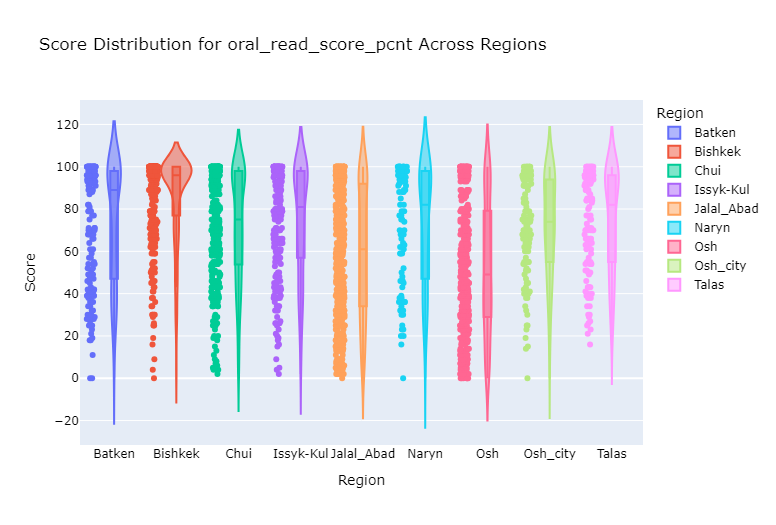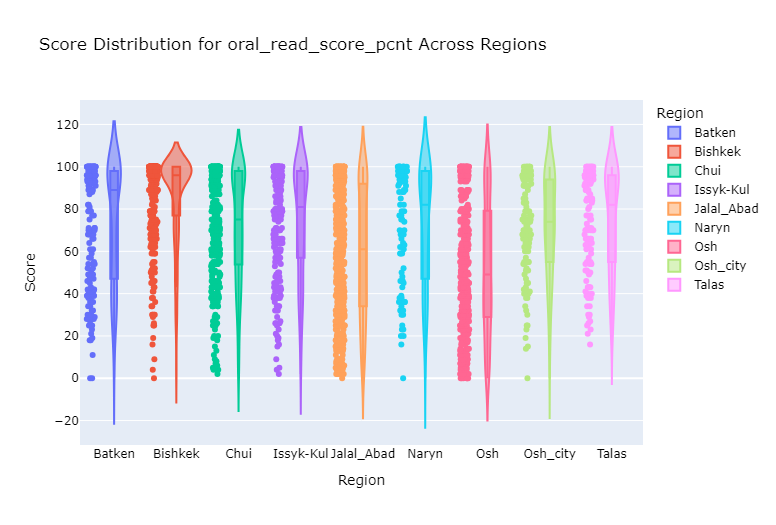

For this first one, there's no real visible difference. I wouldn't expect that within the larger dataset considering the number of observations, except perhaps for Batken.

However! When we get into Ps4 language + region distributions and visual shenanigans, now we have a much better dataset to start telling the story between groups within the regions!

#PS4 - exploring the north south relationship
As we're beginning to see in the data, there appears to be something interesting going on in Osh.

Literature notes that there are vast differences between the North (mountainous) and South (Ferghana Valley) between the country.

**Ethnic Differences and History:**

 When Stalin and the Politburo developed the demarcation of borderlines for the development of the five Soviet SSR's, they assigned borders based on resources, economics, and ethnicities, with a greater focus on resources and economics centralization; water lines, utilities, and transport were considered key factors of where to draw dividing lines.

 the Kyrgyz socialist republic became formalized in 1936; during that time, some land from Uzbekistan was apportioned to this forming republic.

This became a significant issue in the Ferghana Valley after the fall of the USSR, where numerous self identified ethnicities existed. Moscow created these borders for internal reasons within republics; i.e., a self contained system. These were not designed to act as international borders.

The Soviets:
1. Reduced ethnicities down to Kyrgyz, Uzbek, or Tajik for the Valley, when conducting census's; eliminating several ethnicities/self identification of ethnicities within the valley
2. Took some uzbek or tajik majority cities and put them in Kyrgyz, or Uzbek, or Tajik borders - such as Osh
3.  creation of several exclaves as a result of various nationality groups within these newly formed borders.
   Central Asia has 7 enclaves (they are also all exclaves, if you want to get technical). Tajikistan has 3 exclaves within Uzbekistan and Kyrgyzstan:

Sarvan (OSM)
Vorukh (OSM)
Kaygarach / Western Qalacha (Gmaps)
Uzbekistan has 4 exclaves within Kyrgyzstan:

Sokh (OSM) and nearby Qalacha (OSM)
Shohimardon (OSM)
Jangyy-Ayyl (OSM)

The demographic table shown before shows the population spread between Kyrgyz regions.

**Language Policy**
In brief, there has been a focus on elevating Kyrgyz as the official language of business, with Russian as an official language.
Language policy regarding Uzbek and Tajik instruction have been minimal; ethnic riots and deaths occuring in 2010 in Osh in some ways impacted language policy; piloting of multilingual schools, inclusive of Uzbek, began in 2013 and has continued.

In that sense, there is a definitive interest to compare the following:

1. North vs South Scores - how do these regions compare to one another?
2. Scores within regions in the south, specifically on minority languages, as not all students who speak uzbek at home may be going to uzbek schools



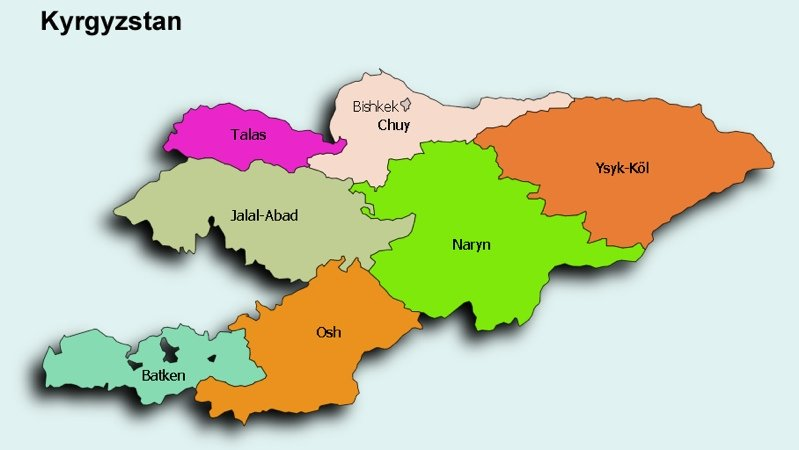

##North vs South
Firstly, I would establish that Bishkek is an outlier to the larger regional comparison between regions. Bishkek out performs all other regions due to the centralization of power, influence, opportunity, and political power held within the capital.



In [185]:
south = base[(base['region'] == 'Jalal_abad') | (base['region'] == 'Osh') | (base['region'] == 'Osh_city') | (base['region'] == 'Batken')]
northbishkek = base[(base['region'] == 'Bishkek') | (base['region'] == 'Chui') | (base['region'] == 'Issyk-Kul') | (base['region'] == 'Talas')| (base['region'] == 'Naryn')]
north = base[(base['region'] == 'Chui') | (base['region'] == 'Issyk-Kul') | (base['region'] == 'Talas')| (base['region'] == 'Naryn')]

In [186]:
northbishkek.value_counts()
north.value_counts()
south.value_counts()


region     district        language  urbanrural  female  age  g2_year  oral_read_score_pcnt  oral_read_attempted_pcnt  read_comp_score_pcnt  word_score  word_score_pcnt  invent_word_score_pcnt  list_comp_score_pcnt
Bishkek    Первомайский    Russian   Urban       Female  8    2021     100                   100                       100                   3           50               92                      60                      2
           Октябрьский     Russian   Urban       Female  8    2021     100                   100                       100                   6           100              100                     100                     2
Issyk-Kul  Иссык-Кульский  Kyrgyz    Rural       Female  9    2021     41                    100                       20                    3           50               42                      80                      1
                                                                                             96                        20                    5           83               46                      80                      1
                                                         8    2021     98                    100                       40                    4           67               64                      60                      1
                                                                                                                                                                                                                         ..
Chui       Московский      Russian   Rural       Female  7    2021     36                    100                       40                    4           67               36                      60                      1
           Кеминский       Russian   Rural       Male    9    2021     75                    100                       20                    1           17               62                      0                       1
                                                         8    2021     100                   100                       60                    3           50               64                      80                      1
                                                                       98                    98                        100                   4           67               88                      60                      1
           Московский      Russian   Rural       Female  8    2021     94                    94                        80                    2           33               48                      100                     1
Name: count, Length: 1123, dtype: int64

region  district   language  urbanrural  female  age  g2_year  oral_read_score_pcnt  oral_read_attempted_pcnt  read_comp_score_pcnt  word_score  word_score_pcnt  invent_word_score_pcnt  list_comp_score_pcnt
Talas   г. Талас   Russian   Rural       Male    9    2021     98                    98                        80                    6           100              86                      40                      1
Chui    Жайылский  Kyrgyz    Rural       Female  8    2021     34                    90                        0                     2           33               34                      100                     1
                                                               36                    83                        20                    5           83               30                      60                      1
                                                               63                    100                       20                    2           33               56                      100                     1
                                                               70                    93                        80                    5           83               38                      40                      1
                                                                                                                                                                                                                 ..
                             Urban       Female  8    2021     98                    98                        80                    5           83               82                      60                      1
                                                               89                    100                       80                    4           67               92                      80                      1
                                                               88                    100                       80                    6           100              66                      80                      1
                                                               59                    97                        60                    6           100              52                      40                      1
                             Rural       Male    9    2021     39                    88                        40                    6           100              48                      40                      1
Name: count, Length: 807, dtype: int64

region  district      language  urbanrural  female  age  g2_year  oral_read_score_pcnt  oral_read_attempted_pcnt  read_comp_score_pcnt  word_score  word_score_pcnt  invent_word_score_pcnt  list_comp_score_pcnt
Batken  Лейлекский    Uzbek     Rural       Female  8    2021     100                   100                       100                   6           100              96                      100                     2
                                                    9    2021     100                   100                       100                   6           100              66                      100                     2
                                                    8    2021     98                    98                        100                   6           100              94                      100                     2
Osh     Ноокатский    Kyrgyz    Rural       Female  9    2021     21                    92                        0                     2           33               14                      0                       1
                                            Male    7    2021     29                    73                        0                     2           33               28                      20                      1
                                                                                                                                                                                                                    ..
        Алайский      Kyrgyz    Rural       Female  8    2021     73                    100                       80                    1           17               54                      100                     1
                                                                  98                    98                        60                    1           17               56                      40                      1
                                                                                                                  100                   5           83               78                      80                      1
                                                                  100                   100                       60                    6           100              82                      100                     1
Batken  г. Кызыл-Кия  Russian   Urban       Male    7    2021     28                    83                        0                     1           17               32                      0                       1
Name: count, Length: 874, dtype: int64

<Figure size 800x480 with 0 Axes>

<Axes: xlabel='oral_read_score_pcnt', ylabel='Count'>

<Axes: xlabel='oral_read_score_pcnt', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Oral Read Scores for South and North Regions, Including Bishkek')

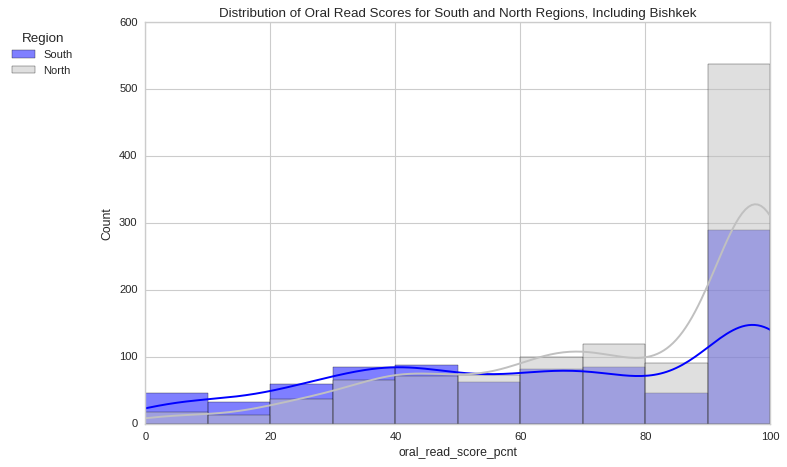

In [156]:
# Plotting histograms to compare distributions
plt.figure(figsize=(10, 6))
sns.histplot(south['oral_read_score_pcnt'], color='blue', kde=True, label='South', bins=10)
sns.histplot(northbishkek['oral_read_score_pcnt'], color='silver', kde=True, label='North', bins=10)
plt.legend(title='Region')
plt.title('Distribution of Oral Read Scores for South and North Regions, Including Bishkek')
plt.legend(title='Region', bbox_to_anchor=(-.1, 1))  # x=-0.1 shifts it to the left
plt.tight_layout()

plt.show()


<Figure size 800x480 with 0 Axes>

<Axes: xlabel='oral_read_score_pcnt', ylabel='Count'>

<Axes: xlabel='oral_read_score_pcnt', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Oral Read Scores for South and North Regions Excluding Bishkek')

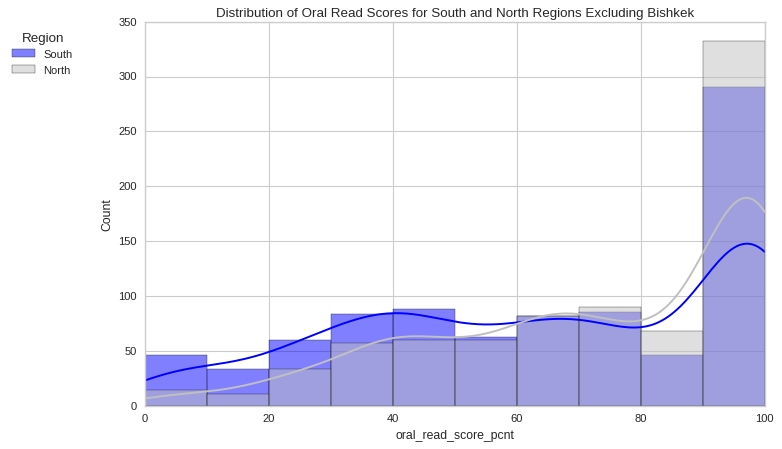

In [157]:
# Plotting histograms to compare distributions
plt.figure(figsize=(10, 6))
sns.histplot(south['oral_read_score_pcnt'], color='blue', kde=True, label='South', bins=10)
sns.histplot(north['oral_read_score_pcnt'], color='silver', kde=True, label='North', bins=10)
plt.legend(title='Region')
plt.legend(title='Region', bbox_to_anchor=(-.1, 1))
plt.title('Distribution of Oral Read Scores for South and North Regions Excluding Bishkek')
plt.show()


<Figure size 800x480 with 0 Axes>

<Axes: xlabel='read_comp_score_pcnt', ylabel='Count'>

<Axes: xlabel='read_comp_score_pcnt', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Oral Read Comp Scores for South and North Regions Including Bishkek')

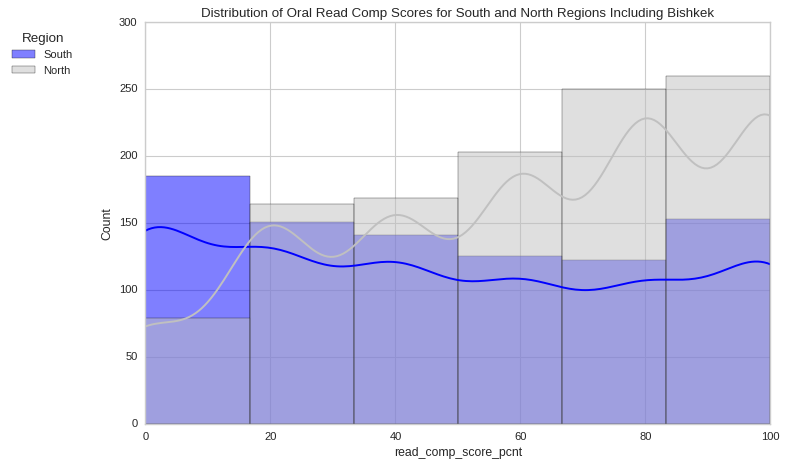

In [161]:
# Plotting histograms to compare distributions
plt.figure(figsize=(10, 6))
sns.histplot(south['read_comp_score_pcnt'], color='blue', kde=True, label='South', bins=10, binwidth=18)
sns.histplot(northbishkek['read_comp_score_pcnt'], color='silver', kde=True, label='North', bins=10, binwidth=18)
plt.legend(title='Region')
plt.title('Distribution of Oral Read Comp Scores for South and North Regions Including Bishkek')
plt.legend(title='Region', bbox_to_anchor=(-.1, 1))  # x=-0.1 shifts it to the left
plt.tight_layout()

plt.show()


<Figure size 800x480 with 0 Axes>

<Axes: xlabel='read_comp_score_pcnt', ylabel='Count'>

<Axes: xlabel='read_comp_score_pcnt', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Oral Read Comp Scores for South and North Regions, Excluding Bishkek')

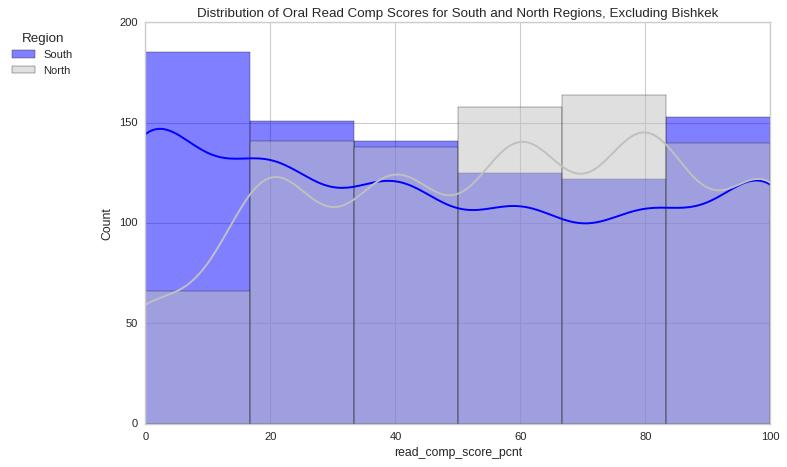

In [150]:
# Plotting histograms to compare distributions
plt.figure(figsize=(10, 6))
sns.histplot(south['read_comp_score_pcnt'], color='blue', kde=True, label='South', bins=10, binwidth=18)
sns.histplot(north['read_comp_score_pcnt'], color='silver', kde=True, label='North', bins=10, binwidth=18)
plt.legend(title='Region')
plt.title('Distribution of Oral Read Comp Scores for South and North Regions, Excluding Bishkek')
plt.legend(title='Region', bbox_to_anchor=(-.1, 1))  # x=-0.1 shifts it to the left
plt.tight_layout()

plt.show()


<Figure size 800x480 with 0 Axes>

<Axes: xlabel='list_comp_score_pcnt', ylabel='Count'>

<Axes: xlabel='list_comp_score_pcnt', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of listening comp Scores for South and North Regions, Including Bishkek')

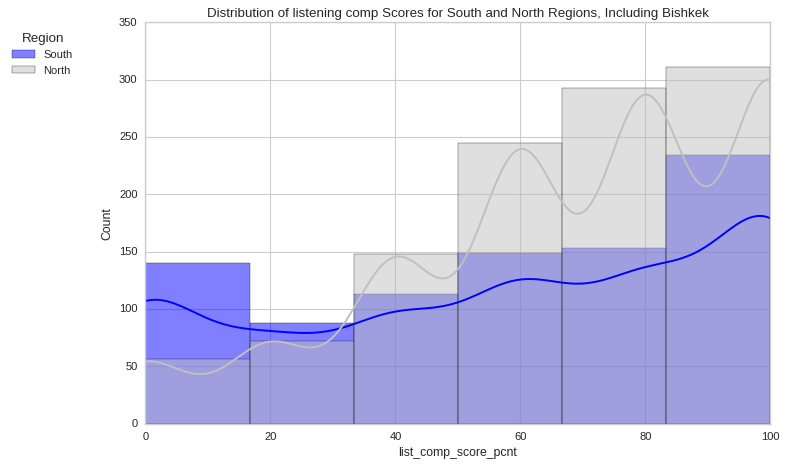

In [152]:
# Plotting histograms to compare distributions
plt.figure(figsize=(10, 6))
sns.histplot(south['list_comp_score_pcnt'], color='blue', kde=True, label='South', bins=10, binwidth=18)
sns.histplot(northbishkek['list_comp_score_pcnt'], color='silver', kde=True, label='North', bins=10, binwidth=18)
plt.legend(title='Region')
plt.title('Distribution of listening comp Scores for South and North Regions, Including Bishkek')
plt.legend(title='Region', bbox_to_anchor=(-.1, 1))  # x=-0.1 shifts it to the left
plt.tight_layout()

plt.show()


<Figure size 800x480 with 0 Axes>

<Axes: xlabel='list_comp_score_pcnt', ylabel='Count'>

<Axes: xlabel='list_comp_score_pcnt', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of listening comp Scores for South and North Regions, Excluding Bishkek')

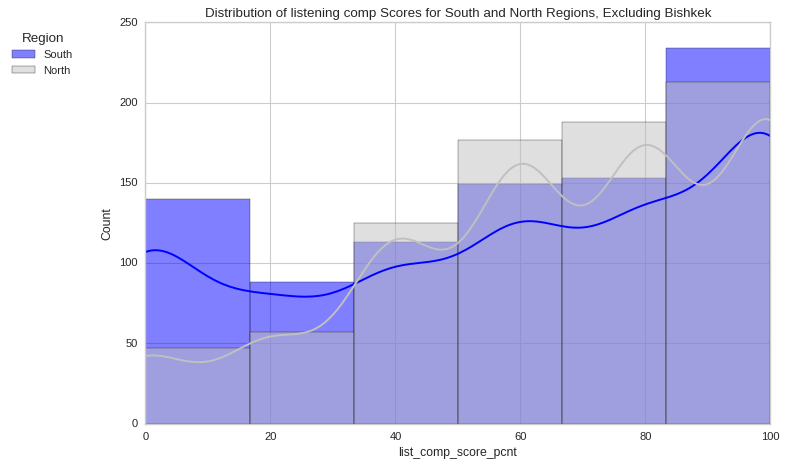

In [153]:
# Plotting histograms to compare distributions
plt.figure(figsize=(10, 6))
sns.histplot(south['list_comp_score_pcnt'], color='blue', kde=True, label='South', bins=10, binwidth=18)
sns.histplot(north['list_comp_score_pcnt'], color='silver', kde=True, label='North', bins=10, binwidth=18)
plt.legend(title='Region')
plt.title('Distribution of listening comp Scores for South and North Regions, Excluding Bishkek')
plt.legend(title='Region', bbox_to_anchor=(-.1, 1))  # x=-0.1 shifts it to the left
plt.tight_layout()

plt.show()

###North vs South Interpretations

##Comparing Languages within regions
The next interesting step, after drawing a north/south comparison, is to look at the language differences within and between southern regions. What questions do these graphs raise for further research, and what kind of trends might we be able to visually pull from this looking at Batken, Jalal-Abad, Osh, and Osh City?

(array([ 1.,  2.,  4.,  2.,  3.,  2.,  2.,  3.,  0., 11.]),
 array([ 11. ,  19.9,  28.8,  37.7,  46.6,  55.5,  64.4,  73.3,  82.2,
         91.1, 100. ]),
 [<matplotlib.patches.Polygon at 0x7e0fc0817410>])

(array([ 1.,  2.,  3.,  5.,  5.,  8.,  1.,  8.,  3., 57.]),
 array([ 13. ,  21.7,  30.4,  39.1,  47.8,  56.5,  65.2,  73.9,  82.6,
         91.3, 100. ]),
 [<matplotlib.patches.Polygon at 0x7e0fc087cf50>])

(array([ 1.,  3.,  5., 11.,  7.,  9.,  7., 10.,  7., 80.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [<matplotlib.patches.Polygon at 0x7e0fc082ea10>])

Text(0.5, 1.0, 'Oral Read Score Distribution for Batken Region by Language')

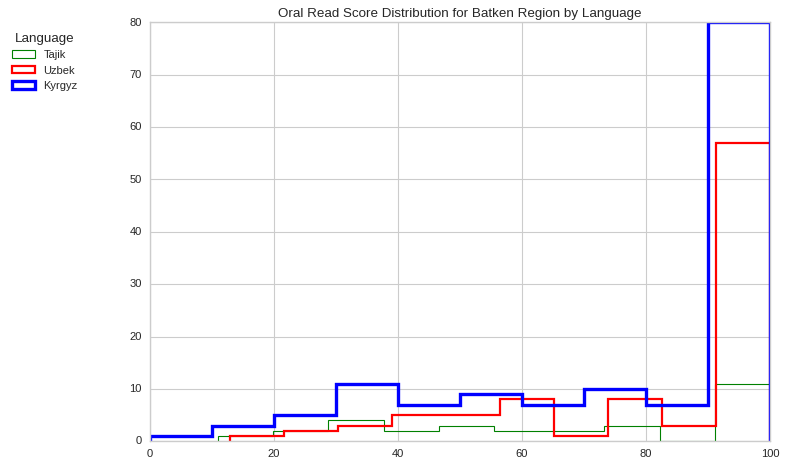

In [197]:
# Assuming 'base' is your DataFrame
# Filter for Batken region
batken_data = base[base['region'] == 'Batken']

# Create separate datasets for each language
tajik_data = batken_data[batken_data['language'] == 'Tajik']['oral_read_score_pcnt']
uzbek_data = batken_data[batken_data['language'] == 'Uzbek']['oral_read_score_pcnt']
kyrgyz_data = batken_data[batken_data['language'] == 'Kyrgyz']['oral_read_score_pcnt']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the linewidths and edgecolors for each language
linewidths = [1, 2, 3]
edgecolors = ["green", "red", "blue"]

# Plot the histograms for each language with different linewidths
ax.hist(tajik_data, bins=10, histtype="step", linewidth=linewidths[0], edgecolor=edgecolors[0], label='Tajik')
ax.hist(uzbek_data, bins=10, histtype="step", linewidth=linewidths[1], edgecolor=edgecolors[1], label='Uzbek')
ax.hist(kyrgyz_data, bins=10, histtype="step", linewidth=linewidths[2], edgecolor=edgecolors[2], label='Kyrgyz')

# Add title and legend
ax.set_title("Oral Read Score Distribution for Batken Region by Language")
ax.legend(title="Language")
plt.legend(title='Language', bbox_to_anchor=(-.1, 1))  # x=-0.1 shifts it to the left
plt.tight_layout()

# Show the plot
plt.show()

(array([ 9.,  6., 12., 15., 21., 12., 13., 11.,  5., 10.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [<matplotlib.patches.Polygon at 0x7e0fc0deff50>])

(array([ 2.,  1.,  2.,  6.,  2.,  8.,  2.,  2.,  2., 13.]),
 array([ 20.,  28.,  36.,  44.,  52.,  60.,  68.,  76.,  84.,  92., 100.]),
 [<matplotlib.patches.Polygon at 0x7e0fc0929950>])

(array([34., 18., 25., 38., 21., 18., 22., 23., 18., 66.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [<matplotlib.patches.Polygon at 0x7e0fc0dd6450>])

Text(0.5, 1.0, 'Oral Read Score Distribution for Osh Region by Language')

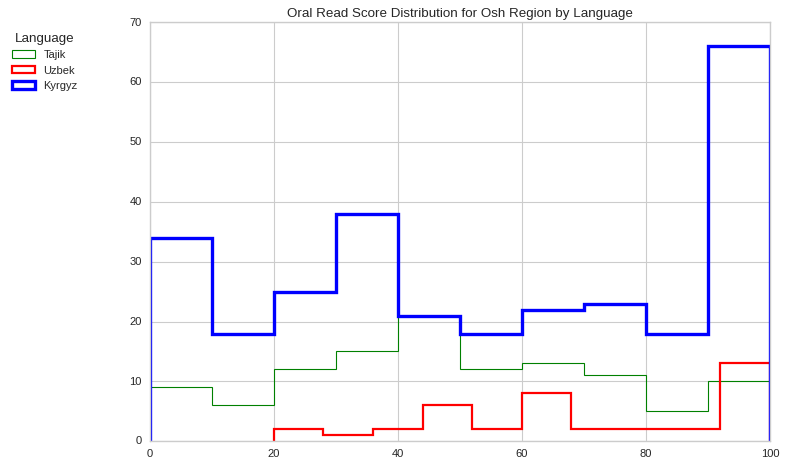

In [198]:
# Assuming 'base' is your DataFrame
# Filter for Batken region
osh_data = base[base['region'] == 'Osh']

# Create separate datasets for each language
orussian_data = osh_data[osh_data['language'] == 'Russian']['oral_read_score_pcnt']
ouzbek_data = osh_data[osh_data['language'] == 'Uzbek']['oral_read_score_pcnt']
okyrgyz_data = osh_data[osh_data['language'] == 'Kyrgyz']['oral_read_score_pcnt']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the linewidths and edgecolors for each language
linewidths = [1, 2, 3]
edgecolors = ["green", "red", "blue"]

# Plot the histograms for each language with different linewidths
ax.hist(orussian_data, bins=10, histtype="step", linewidth=linewidths[0], edgecolor=edgecolors[0], label='Tajik')
ax.hist(ouzbek_data, bins=10, histtype="step", linewidth=linewidths[1], edgecolor=edgecolors[1], label='Uzbek')
ax.hist(okyrgyz_data, bins=10, histtype="step", linewidth=linewidths[2], edgecolor=edgecolors[2], label='Kyrgyz')

# Add title and legend
ax.set_title("Oral Read Score Distribution for Osh Region by Language")
ax.legend(title="Language")
plt.legend(title='Language', bbox_to_anchor=(-.1, 1))  # x=-0.1 shifts it to the left
plt.tight_layout()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Tajik Language')

Text(0.5, 0, 'Oral Read Score (%)')

Text(0, 0.5, 'Reading Comprehension Score (%)')

Text(0.5, 1.0, 'Uzbek Language')

Text(0.5, 0, 'Oral Read Score (%)')

Text(0, 0.5, 'Reading Comprehension Score (%)')

Text(0.5, 1.0, 'Russian Language')

Text(0.5, 0, 'Oral Read Score (%)')

Text(0, 0.5, 'Reading Comprehension Score (%)')

Text(0.5, 1.0, 'Kyrgyz Language')

Text(0.5, 0, 'Oral Read Score (%)')

Text(0, 0.5, 'Reading Comprehension Score (%)')

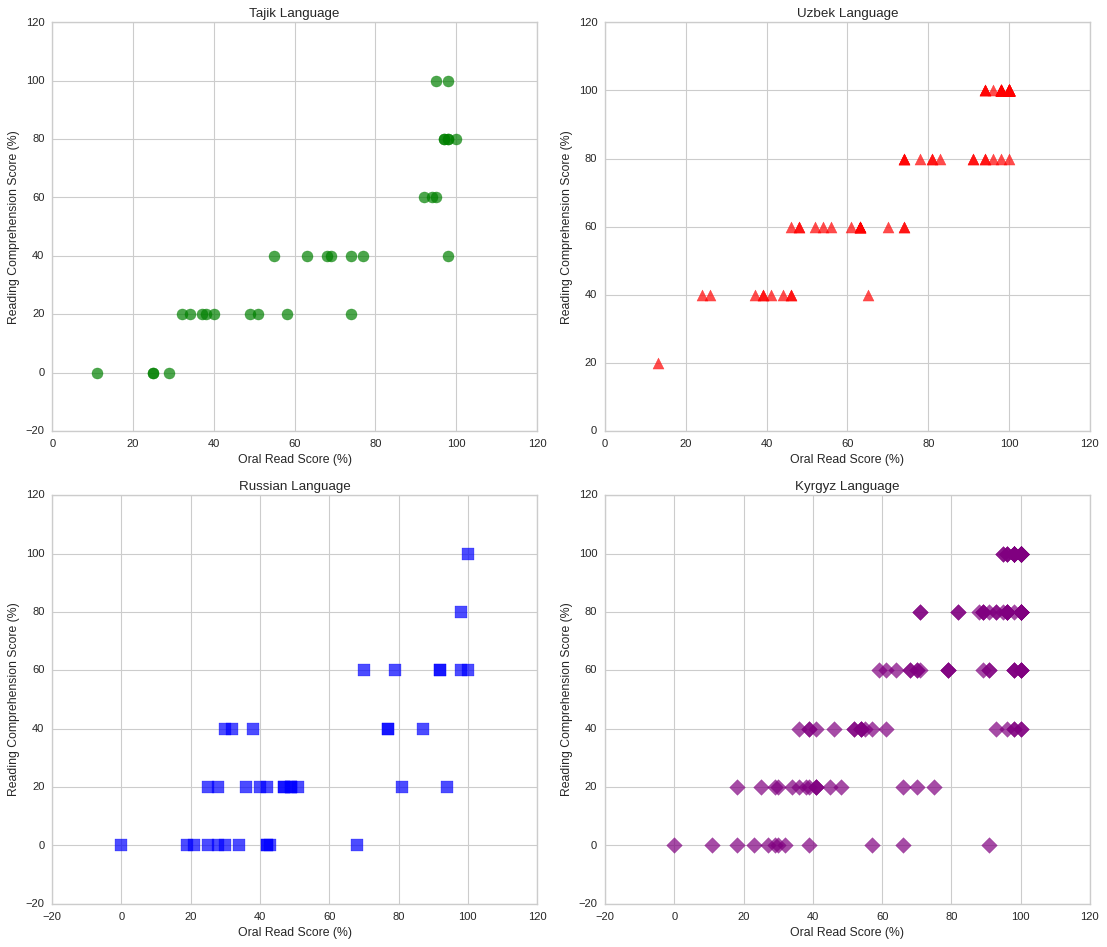

In [200]:
# Assuming 'base' is your DataFrame
# Filter for Batken region
batken_data = base[base['region'] == 'Batken']

# Define the languages to plot
languages = ['Tajik', 'Uzbek', 'Russian', 'Kyrgyz']

# Create the subplots for each language
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2 rows and 2 columns for the panel

# Flatten the 2D axes array to make iteration easier
axes = axes.flatten()

# Define the colors and markers for each language
language_colors = {
    'Tajik': 'green',
    'Uzbek': 'red',
    'Russian': 'blue',
    'Kyrgyz': 'purple'
}

language_markers = {
    'Tajik': 'o',  # Circle marker
    'Uzbek': '^',  # Triangle marker
    'Russian': 's',  # Square marker
    'Kyrgyz': 'D'  # Diamond marker
}

# Loop through each language and plot on the respective axis
for i, language in enumerate(languages):
    language_data = batken_data[batken_data['language'] == language]

    axes[i].scatter(
        language_data['oral_read_score_pcnt'],
        language_data['read_comp_score_pcnt'],
        color=language_colors[language],
        marker=language_markers[language],
        s=100,  # Size of the dots
        alpha=0.7  # Transparency of the dots
    )

    axes[i].set_title(f'{language} Language')
    axes[i].set_xlabel('Oral Read Score (%)')
    axes[i].set_ylabel('Reading Comprehension Score (%)')

# Adjust layout and spacing for clarity
plt.tight_layout()

# Show the plot
plt.show()


<Axes: xlabel='oral_read_score_pcnt', ylabel='Count'>

Text(0.5, 1.0, 'Tajik Language in Batken')

Text(0.5, 0, 'Oral Read Score (%)')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='oral_read_score_pcnt', ylabel='Count'>

Text(0.5, 1.0, 'Uzbek Language in Batken')

Text(0.5, 0, 'Oral Read Score (%)')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='oral_read_score_pcnt', ylabel='Count'>

Text(0.5, 1.0, 'Russian Language in Batken')

Text(0.5, 0, 'Oral Read Score (%)')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='oral_read_score_pcnt', ylabel='Count'>

Text(0.5, 1.0, 'Kyrgyz Language in Batken')

Text(0.5, 0, 'Oral Read Score (%)')

Text(0, 0.5, 'Frequency')

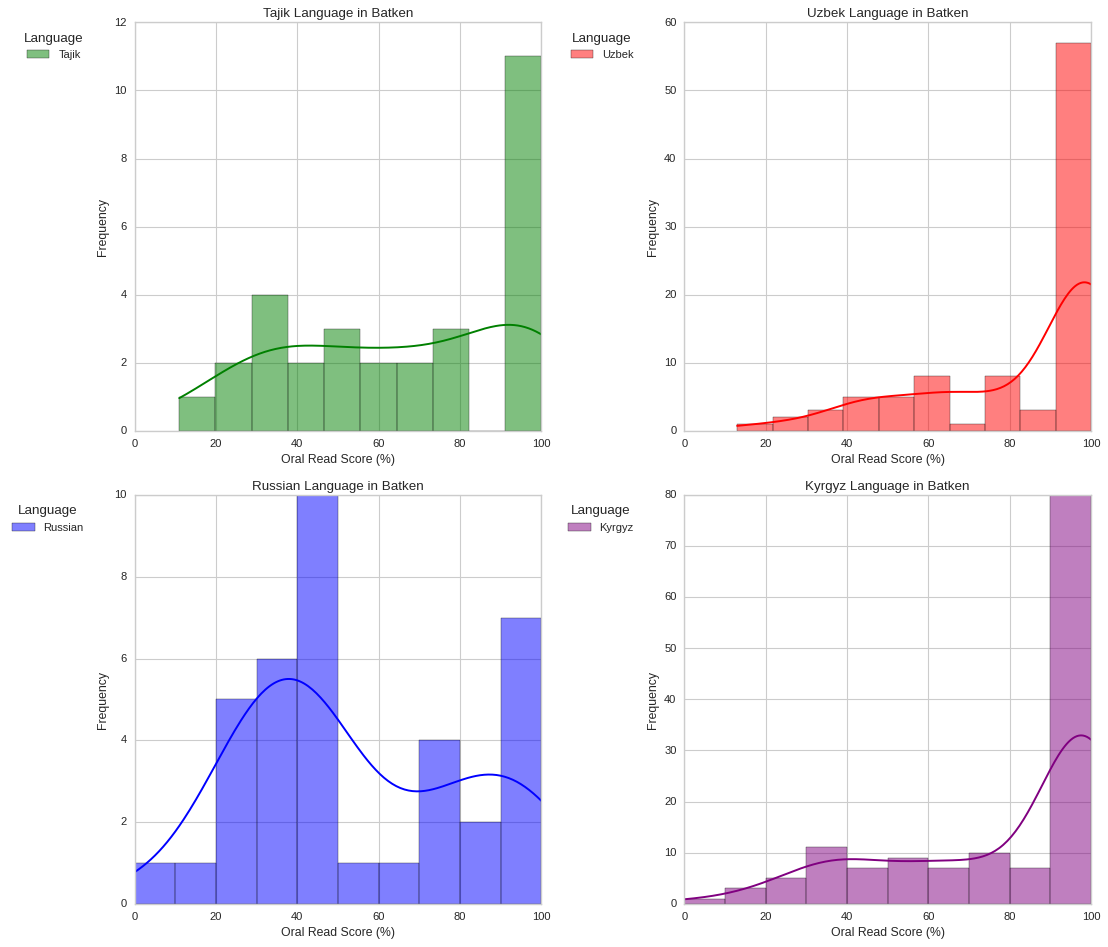

In [207]:
# Define the languages to plot
languages = ['Tajik', 'Uzbek', 'Russian', 'Kyrgyz']

# Create the subplots for each language
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2 rows and 2 columns for the panel

# Flatten the 2D axes array to make iteration easier
axes = axes.flatten()

# Define the colors for each language
language_colors = {
    'Tajik': 'green',
    'Uzbek': 'red',
    'Russian': 'blue',
    'Kyrgyz': 'purple'
}

# Loop through each language and plot the histogram on the respective axis
for i, language in enumerate(languages):
    language_data = batken_data[batken_data['language'] == language]

    sns.histplot(
        language_data['oral_read_score_pcnt'],
        bins=10,
        kde=True,  # Kernel Density Estimate
        color=language_colors[language],
        ax=axes[i],
        label=language
    )

    axes[i].set_title(f'{language} Language in Batken')
    axes[i].set_xlabel('Oral Read Score (%)')
    axes[i].set_ylabel('Frequency')
    axes[i].legend(title="Language",bbox_to_anchor=(-.1, 1))

# Adjust layout and spacing for clarity
plt.tight_layout()

# Show the plot
plt.show()


<Axes: xlabel='read_comp_score_pcnt', ylabel='Count'>

Text(0.5, 1.0, 'Reading Comprehension, G2 Tajik Language in Batken')

Text(0.5, 0, 'read comp score (%)')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='read_comp_score_pcnt', ylabel='Count'>

Text(0.5, 1.0, 'Reading Comprehension, G2 Uzbek Language in Batken')

Text(0.5, 0, 'read comp score (%)')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='read_comp_score_pcnt', ylabel='Count'>

Text(0.5, 1.0, 'Reading Comprehension, G2 Russian Language in Batken')

Text(0.5, 0, 'read comp score (%)')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='read_comp_score_pcnt', ylabel='Count'>

Text(0.5, 1.0, 'Reading Comprehension, G2 Kyrgyz Language in Batken')

Text(0.5, 0, 'read comp score (%)')

Text(0, 0.5, 'Frequency')

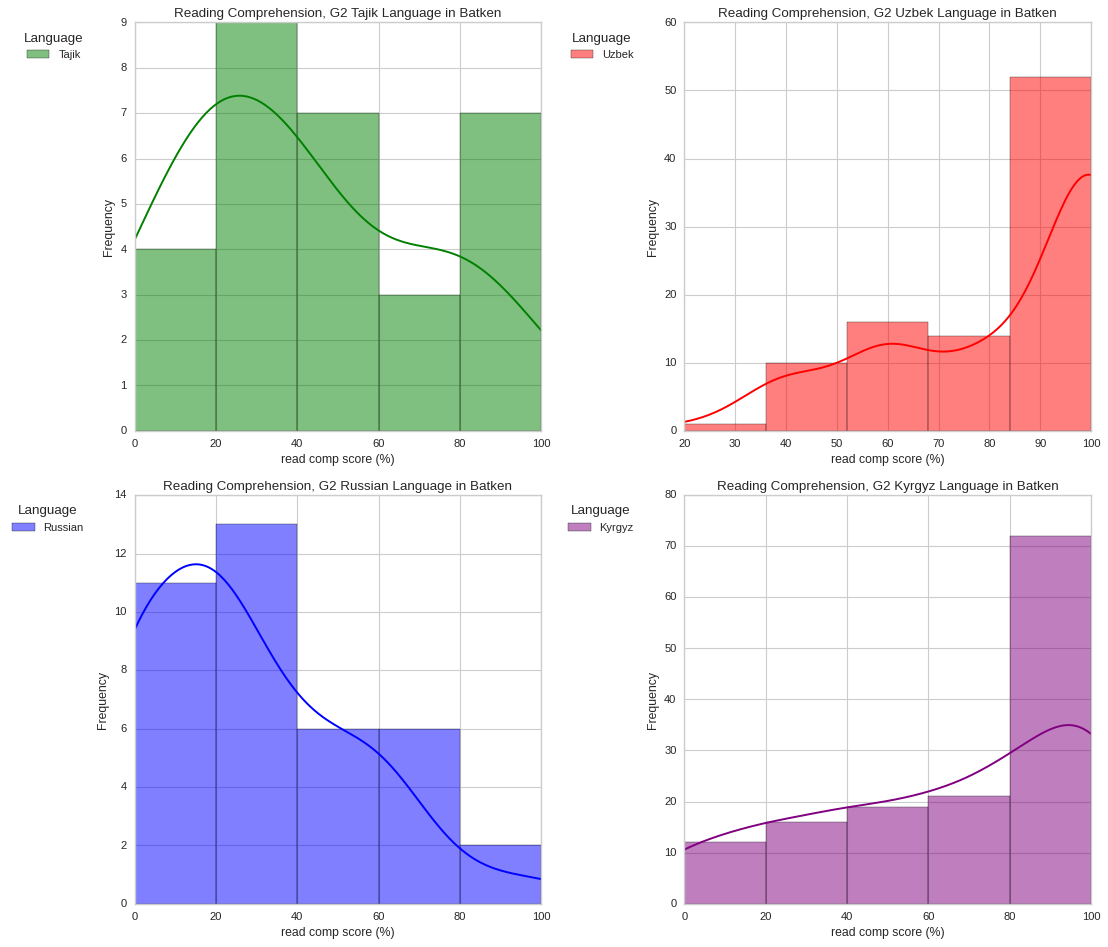

In [209]:
# Define the languages to plot
languages = ['Tajik', 'Uzbek', 'Russian', 'Kyrgyz']

# Create the subplots for each language
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2 rows and 2 columns for the panel

# Flatten the 2D axes array to make iteration easier
axes = axes.flatten()

# Define the colors for each language
language_colors = {
    'Tajik': 'green',
    'Uzbek': 'red',
    'Russian': 'blue',
    'Kyrgyz': 'purple'
}

# Loop through each language and plot the histogram on the respective axis
for i, language in enumerate(languages):
    language_data = batken_data[batken_data['language'] == language]

    sns.histplot(
        language_data['read_comp_score_pcnt'],
        bins=5,
        kde=True,  # Kernel Density Estimate
        color=language_colors[language],
        ax=axes[i],
        label=language
    )

    axes[i].set_title(f'Reading Comprehension, G2 {language} Language in Batken')
    axes[i].set_xlabel('read comp score (%)')
    axes[i].set_ylabel('Frequency')
    axes[i].legend(title="Language",bbox_to_anchor=(-.1, 1))

# Adjust layout and spacing for clarity
plt.tight_layout()

# Show the plot
plt.show()
